In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_dict = dict()  # будемо зберігати сюди результати 

In [2]:
df = pd.read_csv("auction+verification/data.csv")
df

process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                       0                    0                    2   
1                       0                    0                    2   
2                       0                    0                    2   
3                       0                    0                    2   
4                       0                    0                    2   
...                   ...                  ...                  ...   
2038                    2                    3                    2   
2039                    2                    3                    2   
2040                    2                    3                    2   
2041                    2                    3                    2   
2042                    2                    3                    2   

      process.b4.capacity  property.price  property.product  property.winner  \
0                       1              59                 1                0   
1                       1              59                 2                0   
2                       1              59                 4                0   
3                       1              59                 6                0   
4                       1              60                 1                0   
...                   ...             ...               ...              ...   
2038                    1              90                 5                0   
2039                    1              90                 5                1   
2040                    1              90                 5                2   
2041                    1              90                 5                3   
2042                    1              90                 5                4   

      verification.result  verification.time  
0                   False         163.316667  
1                   False         200.860000  
2                   False         154.888889  
3                   False         108.640000  
4                    True          85.466667  
...                   ...                ...  
2038                 True          82.425000  
2039                 True        1316.983333  
2040                False        9365.450000  
2041                False        8474.025000  
2042                 True          82.008333  

[2043 rows x 9 columns]

In [3]:
df.info() # в датасеті відсутні пропуски, є одна категорійна фіча  verification.result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [4]:
df["verification.result"] = df["verification.result"].map({True: 1, False: 0}) 
df

process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                       0                    0                    2   
1                       0                    0                    2   
2                       0                    0                    2   
3                       0                    0                    2   
4                       0                    0                    2   
...                   ...                  ...                  ...   
2038                    2                    3                    2   
2039                    2                    3                    2   
2040                    2                    3                    2   
2041                    2                    3                    2   
2042                    2                    3                    2   

      process.b4.capacity  property.price  property.product  property.winner  \
0                       1              59                 1                0   
1                       1              59                 2                0   
2                       1              59                 4                0   
3                       1              59                 6                0   
4                       1              60                 1                0   
...                   ...             ...               ...              ...   
2038                    1              90                 5                0   
2039                    1              90                 5                1   
2040                    1              90                 5                2   
2041                    1              90                 5                3   
2042                    1              90                 5                4   

      verification.result  verification.time  
0                       0         163.316667  
1                       0         200.860000  
2                       0         154.888889  
3                       0         108.640000  
4                       1          85.466667  
...                   ...                ...  
2038                    1          82.425000  
2039                    1        1316.983333  
2040                    0        9365.450000  
2041                    0        8474.025000  
2042                    1          82.008333  

[2043 rows x 9 columns]

In [5]:

df_orig = df.copy()
df.describe() # звернемо увагу на наш таргет: мінімальне значення 77.9, максимальне - 44130. це досить великі значення. Потрібно їх якось масштабувати. Це ми поки що просто запам'ятаємо


process.b1.capacity  process.b2.capacity  process.b3.capacity  \
count          2043.000000          2043.000000          2043.000000   
mean              1.000000             2.093979             1.883994   
std               0.816696             0.811269             0.320310   
min               0.000000             0.000000             1.000000   
25%               0.000000             1.000000             2.000000   
50%               1.000000             2.000000             2.000000   
75%               2.000000             3.000000             2.000000   
max               2.000000             3.000000             2.000000   

       process.b4.capacity  property.price  property.product  property.winner  \
count          2043.000000     2043.000000       2043.000000      2043.000000   
mean              0.587861       71.473324          3.252080         0.455213   
std               0.492340        8.048740          1.804225         1.062828   
min               0.000000       59.000000          1.000000         0.000000   
25%               0.000000       65.000000          2.000000         0.000000   
50%               1.000000       70.000000          3.000000         0.000000   
75%               1.000000       78.000000          5.000000         0.000000   
max               1.000000       90.000000          6.000000         4.000000   

       verification.result  verification.time  
count          2043.000000        2043.000000  
mean              0.128243        7336.944574  
std               0.334442       10375.393650  
min               0.000000          77.916667  
25%               0.000000         546.818910  
50%               0.000000        1316.983333  
75%               0.000000       10876.638889  
max               1.000000       44130.520833

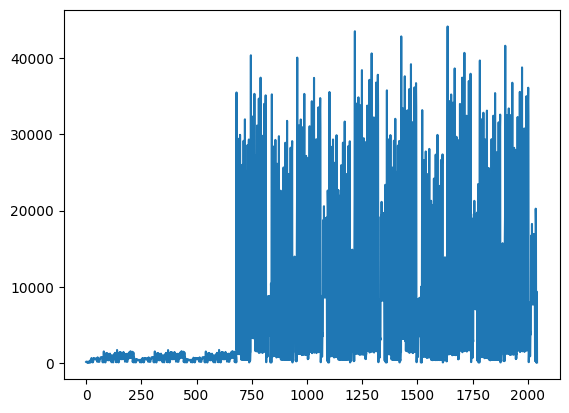

In [6]:
# розподіл даних за таргетом
trgt = "verification.time"
plt.plot(df[trgt])
# бачимо що таргет у нас - це безперервне значення, а також бачимо що третина даних є значно меншою за значенням ніж решта даних

In [7]:
# враховуючи такий дісбаланс значень перед навчанням та предіктом моделей ми будемо застосовувати перетворення таргету за допомогою натурального логарифму
# потім передбачені дані ми будемо конвертувати обратно і оцінювати моделі

<Axes: >

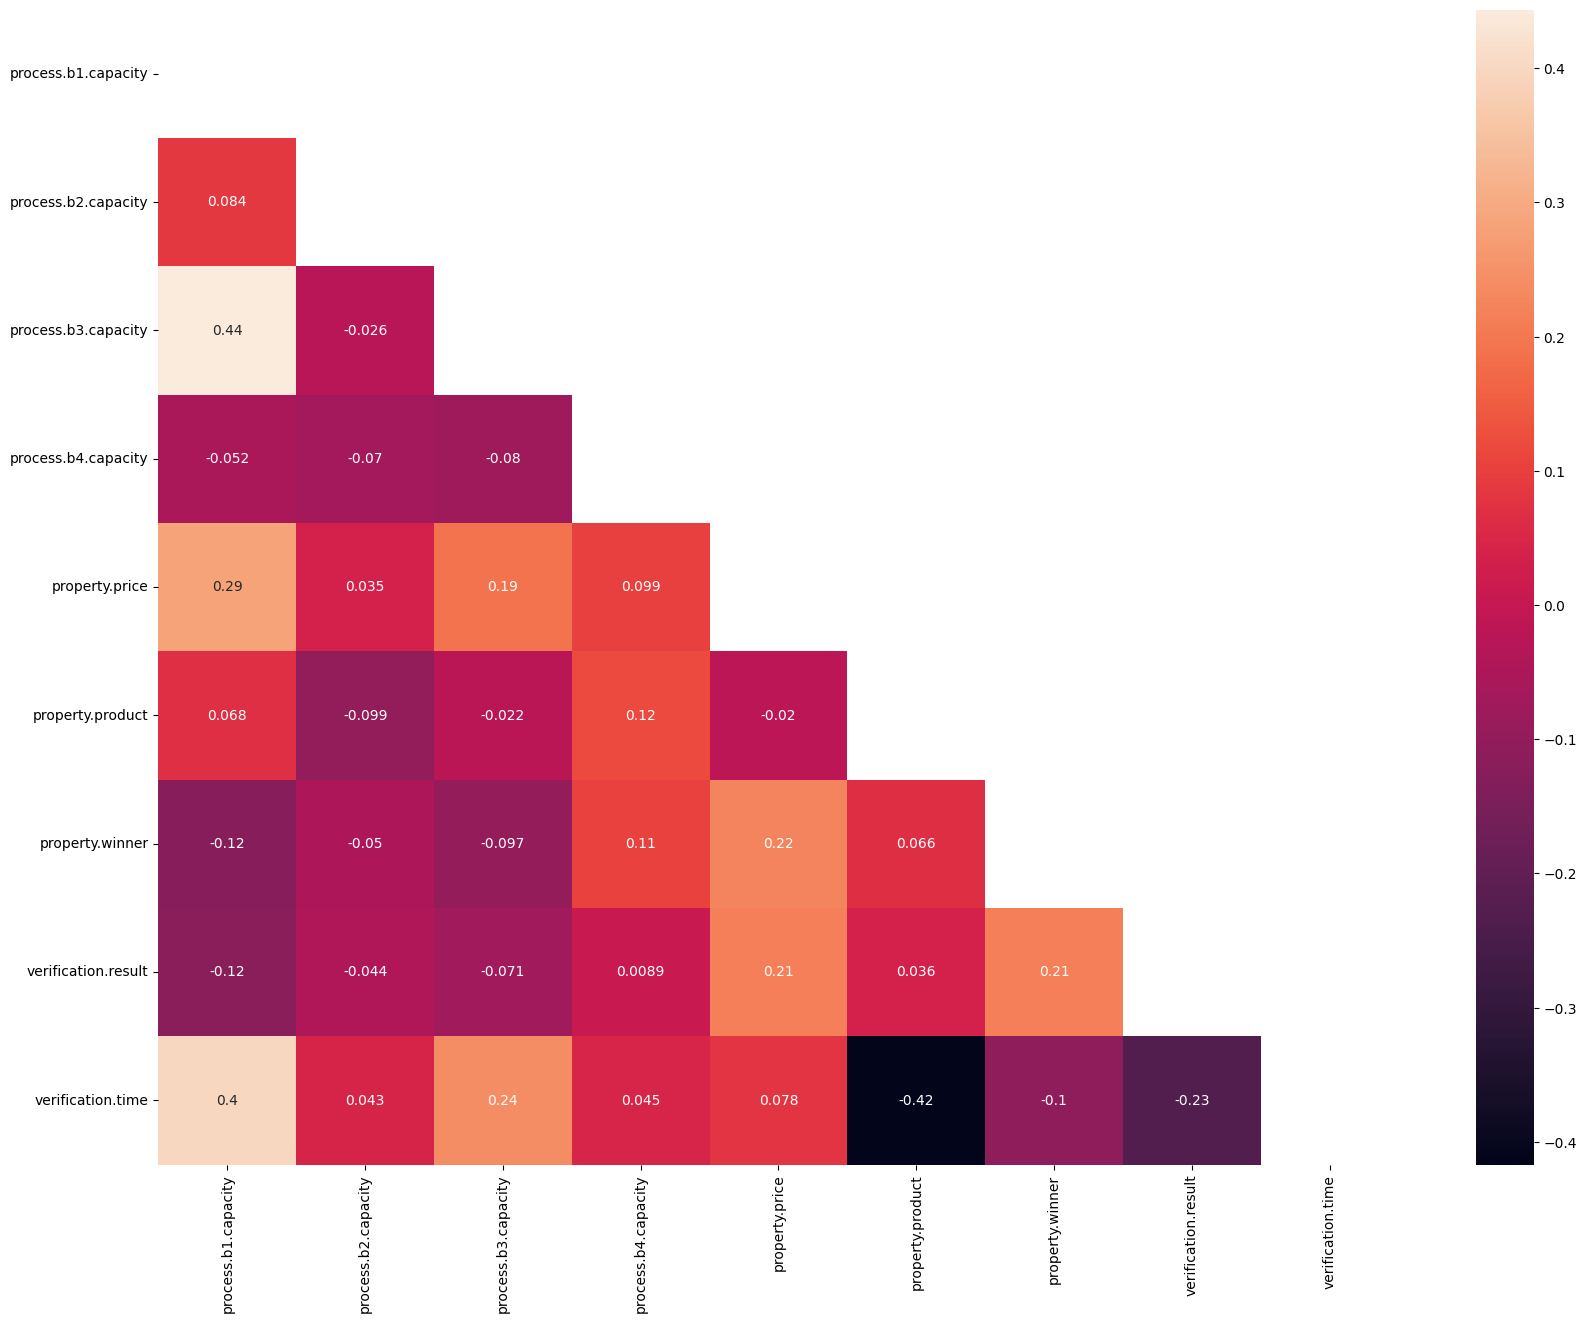

In [8]:
# створимо матрицю кореляцій для розуміння того наскільки силььно ознаки та таргет залежні між собою
import seaborn as sns

cor_matrix = df.corr()

mask = np.triu(np.ones_like(cor_matrix, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(cor_matrix, mask=mask, annot=True)

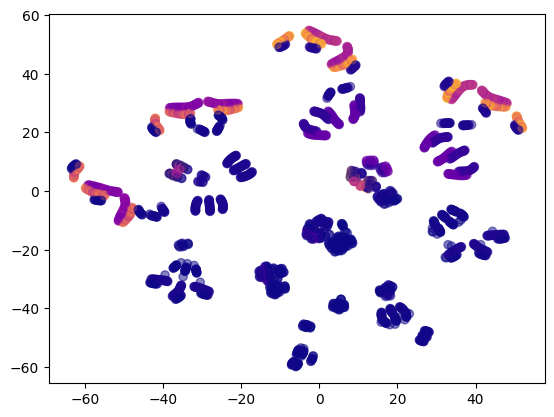

In [9]:
# бачимо помірні кореляції між ознаками та таргетом в діапазоні від -0.42 до 0.53, ніщо не має заважати навчанню моделі. 
# перед створенням додаткових фічей створимо tsne репрезентацію, щоб побачити який наразі ми маємо розподіл класів. 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE

scaler = MinMaxScaler()
df_features = df.drop(columns=trgt)  # прочитав що для об'єктивності потрібно викидати таргет з репрезентації і використовувати тільки для маркування кольорами
df_features_scaled = scaler.fit_transform(df_features)
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(df_features_scaled)

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[trgt], cmap="plasma", alpha=0.5)


In [10]:
# бачимо багато чітковідокремлених груп даних, але групи з найбільшим значенням таргета розрізнені, що може казати нам про більш складні нелінійні залежності

In [11]:
# sns.pairplot(df_features.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='hist')

In [12]:
# бачимо що самі по собі ознаки не мають чіткої лінійної залежності

In [13]:
df

process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                       0                    0                    2   
1                       0                    0                    2   
2                       0                    0                    2   
3                       0                    0                    2   
4                       0                    0                    2   
...                   ...                  ...                  ...   
2038                    2                    3                    2   
2039                    2                    3                    2   
2040                    2                    3                    2   
2041                    2                    3                    2   
2042                    2                    3                    2   

      process.b4.capacity  property.price  property.product  property.winner  \
0                       1              59                 1                0   
1                       1              59                 2                0   
2                       1              59                 4                0   
3                       1              59                 6                0   
4                       1              60                 1                0   
...                   ...             ...               ...              ...   
2038                    1              90                 5                0   
2039                    1              90                 5                1   
2040                    1              90                 5                2   
2041                    1              90                 5                3   
2042                    1              90                 5                4   

      verification.result  verification.time  
0                       0         163.316667  
1                       0         200.860000  
2                       0         154.888889  
3                       0         108.640000  
4                       1          85.466667  
...                   ...                ...  
2038                    1          82.425000  
2039                    1        1316.983333  
2040                    0        9365.450000  
2041                    0        8474.025000  
2042                    1          82.008333  

[2043 rows x 9 columns]

In [14]:
def repr_df_by_tsne(df: pd.DataFrame, tsne_repr, show_labels=False, rows=3,figsize=(12, 5)):
    _, axes = plt.subplots(rows, round(len(df.columns) / rows), sharey=True, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        print(f"Будуємо репрезентацію дл {col}")
        ax = axes[i]
        target = df[col]

        # Отримання унікальних значень та кольорів для кожного з них
        target_unique = np.sort(target.unique())
        colors = plt.cm.rainbow(np.linspace(0, 1, len(target_unique)))

        # Малювання кожного унікального значення окремо з власним кольором
        for val, color in zip(target_unique, colors):
            mask = target == val
            ax.scatter(tsne_repr[mask, 0], tsne_repr[mask, 1], alpha=0.5, label=val if show_labels else None, color=color)

        # Налаштування заголовків та легенди
        ax.set_title(f't-SNE за {col}')
        if show_labels:
            ax.legend(title=col)

    # Налаштування зовнішнього вигляду графіку
    plt.tight_layout()

In [15]:
df = df_orig.copy()

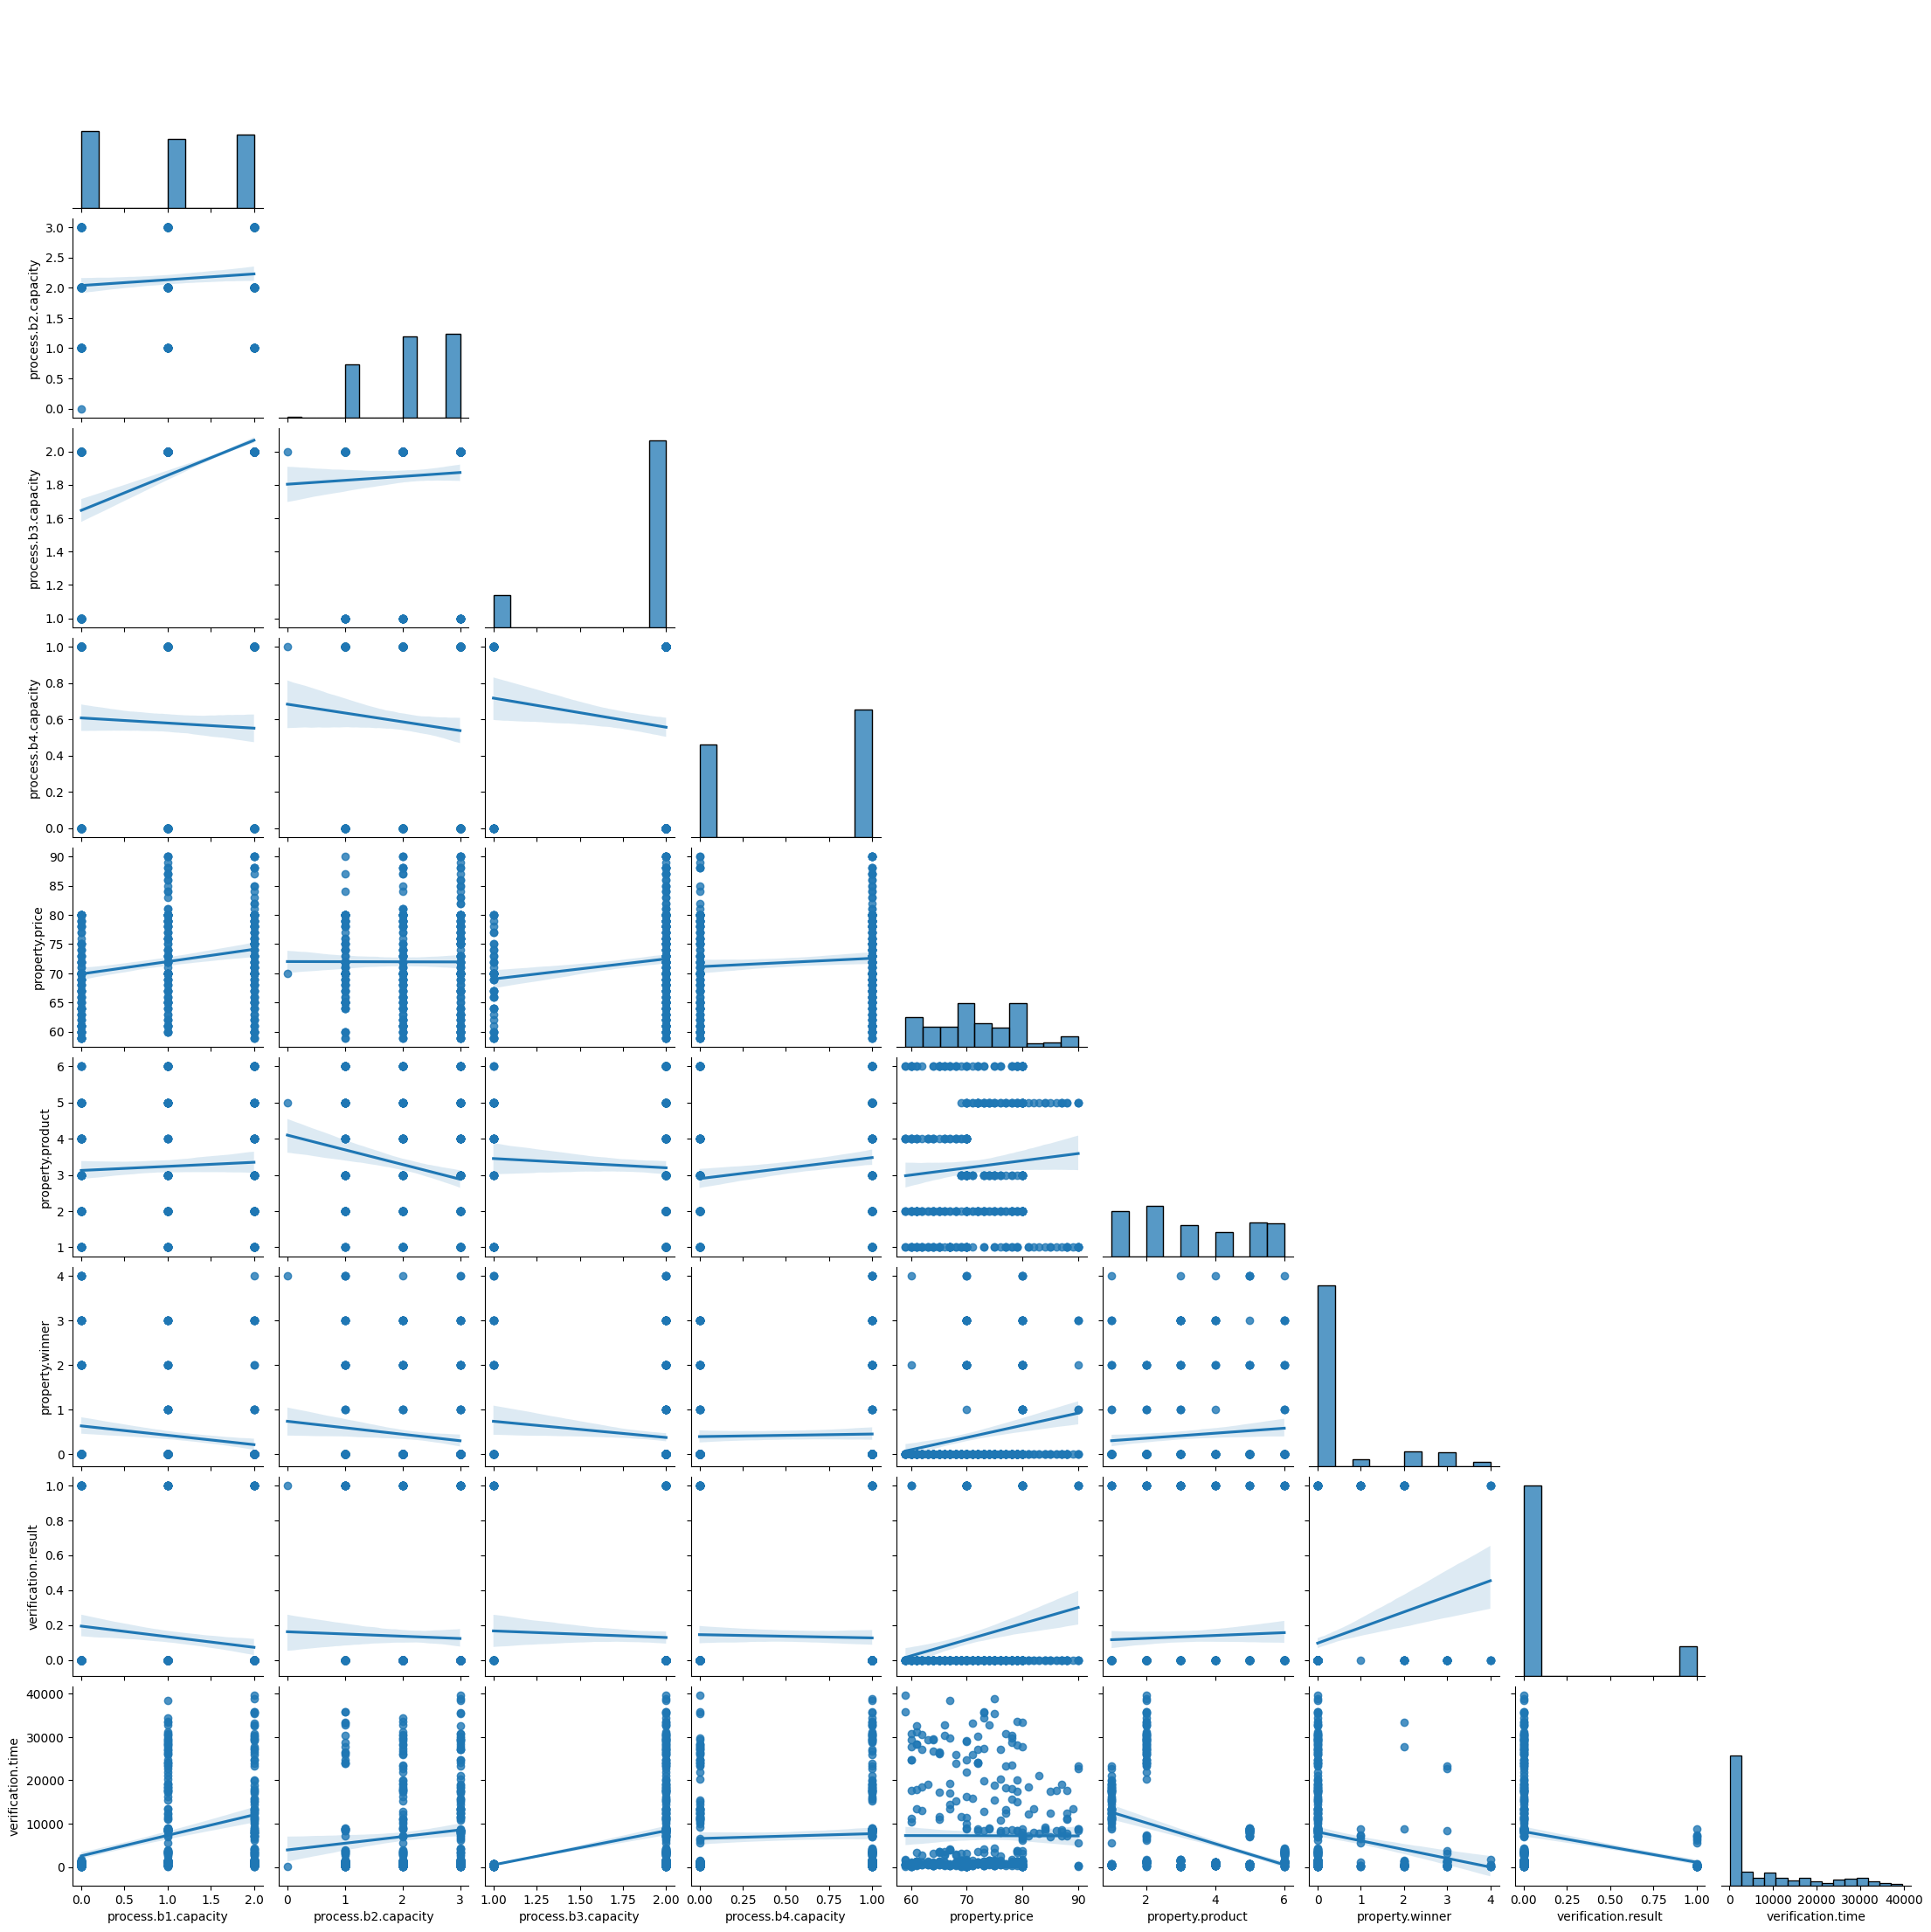

In [16]:
# подивимось на загальну картину розподілу наших даних та на їх взаємозв'язки
sns.pairplot(df.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='hist')

In [17]:
# в першу чергу ми бачимо певні патерни зв'язків між даними. Якщо звернузти увагу на природу даних, то стає зрозуміло, що наші дані досить дискретні.
# це погано для моделей лінійної регресії, але не погано для застосування метричних моделей та дерев рішень.
# перетворення наявних фічей з таких даних не вирішить питання дискретності, тож створимо 2 нові фічі: суму показників capacity та price / product

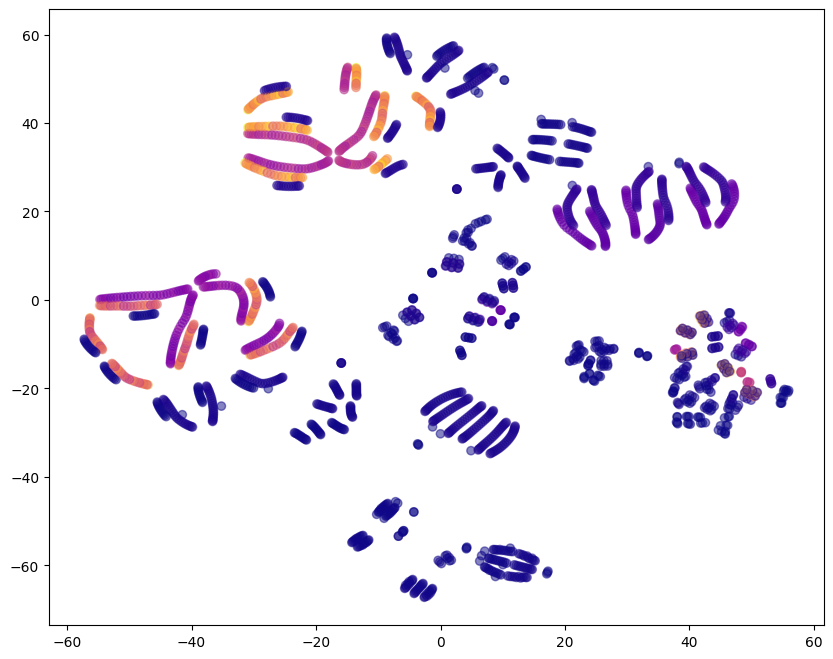

In [18]:
# спочатку зробимо tsne репрезентацію наявних фічей, щоб розуміти чи кращє стали відрізнятись дані після додавання нових фічей
target = df.pop(trgt)
fetures = df

scaler = RobustScaler()
fetures_scaled = scaler.fit_transform(fetures)
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(fetures_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=target, cmap='plasma', alpha=0.5)

# бачимо відокремлені категорії з високими значеннями таргета, але є і деякі викиди з цих категорій які частково перекриваються категоріями із значно меншими значеннями таргета

In [19]:
# бачимо що дані, які ведуть до збільшення часу в своїй більшость утворюють окремі групи. Судячи з репрезентації до збільшення таргету можуть вести 
# дуже різні комбінації ознак
# також бачимо що деякі категорії перекриваються, тобто наявні ознаки не ідеально описують зміну таргета

Будуємо репрезентацію дл process.b1.capacity
Будуємо репрезентацію дл process.b2.capacity
Будуємо репрезентацію дл process.b3.capacity
Будуємо репрезентацію дл process.b4.capacity
Будуємо репрезентацію дл property.price
Будуємо репрезентацію дл property.product
Будуємо репрезентацію дл property.winner
Будуємо репрезентацію дл verification.result


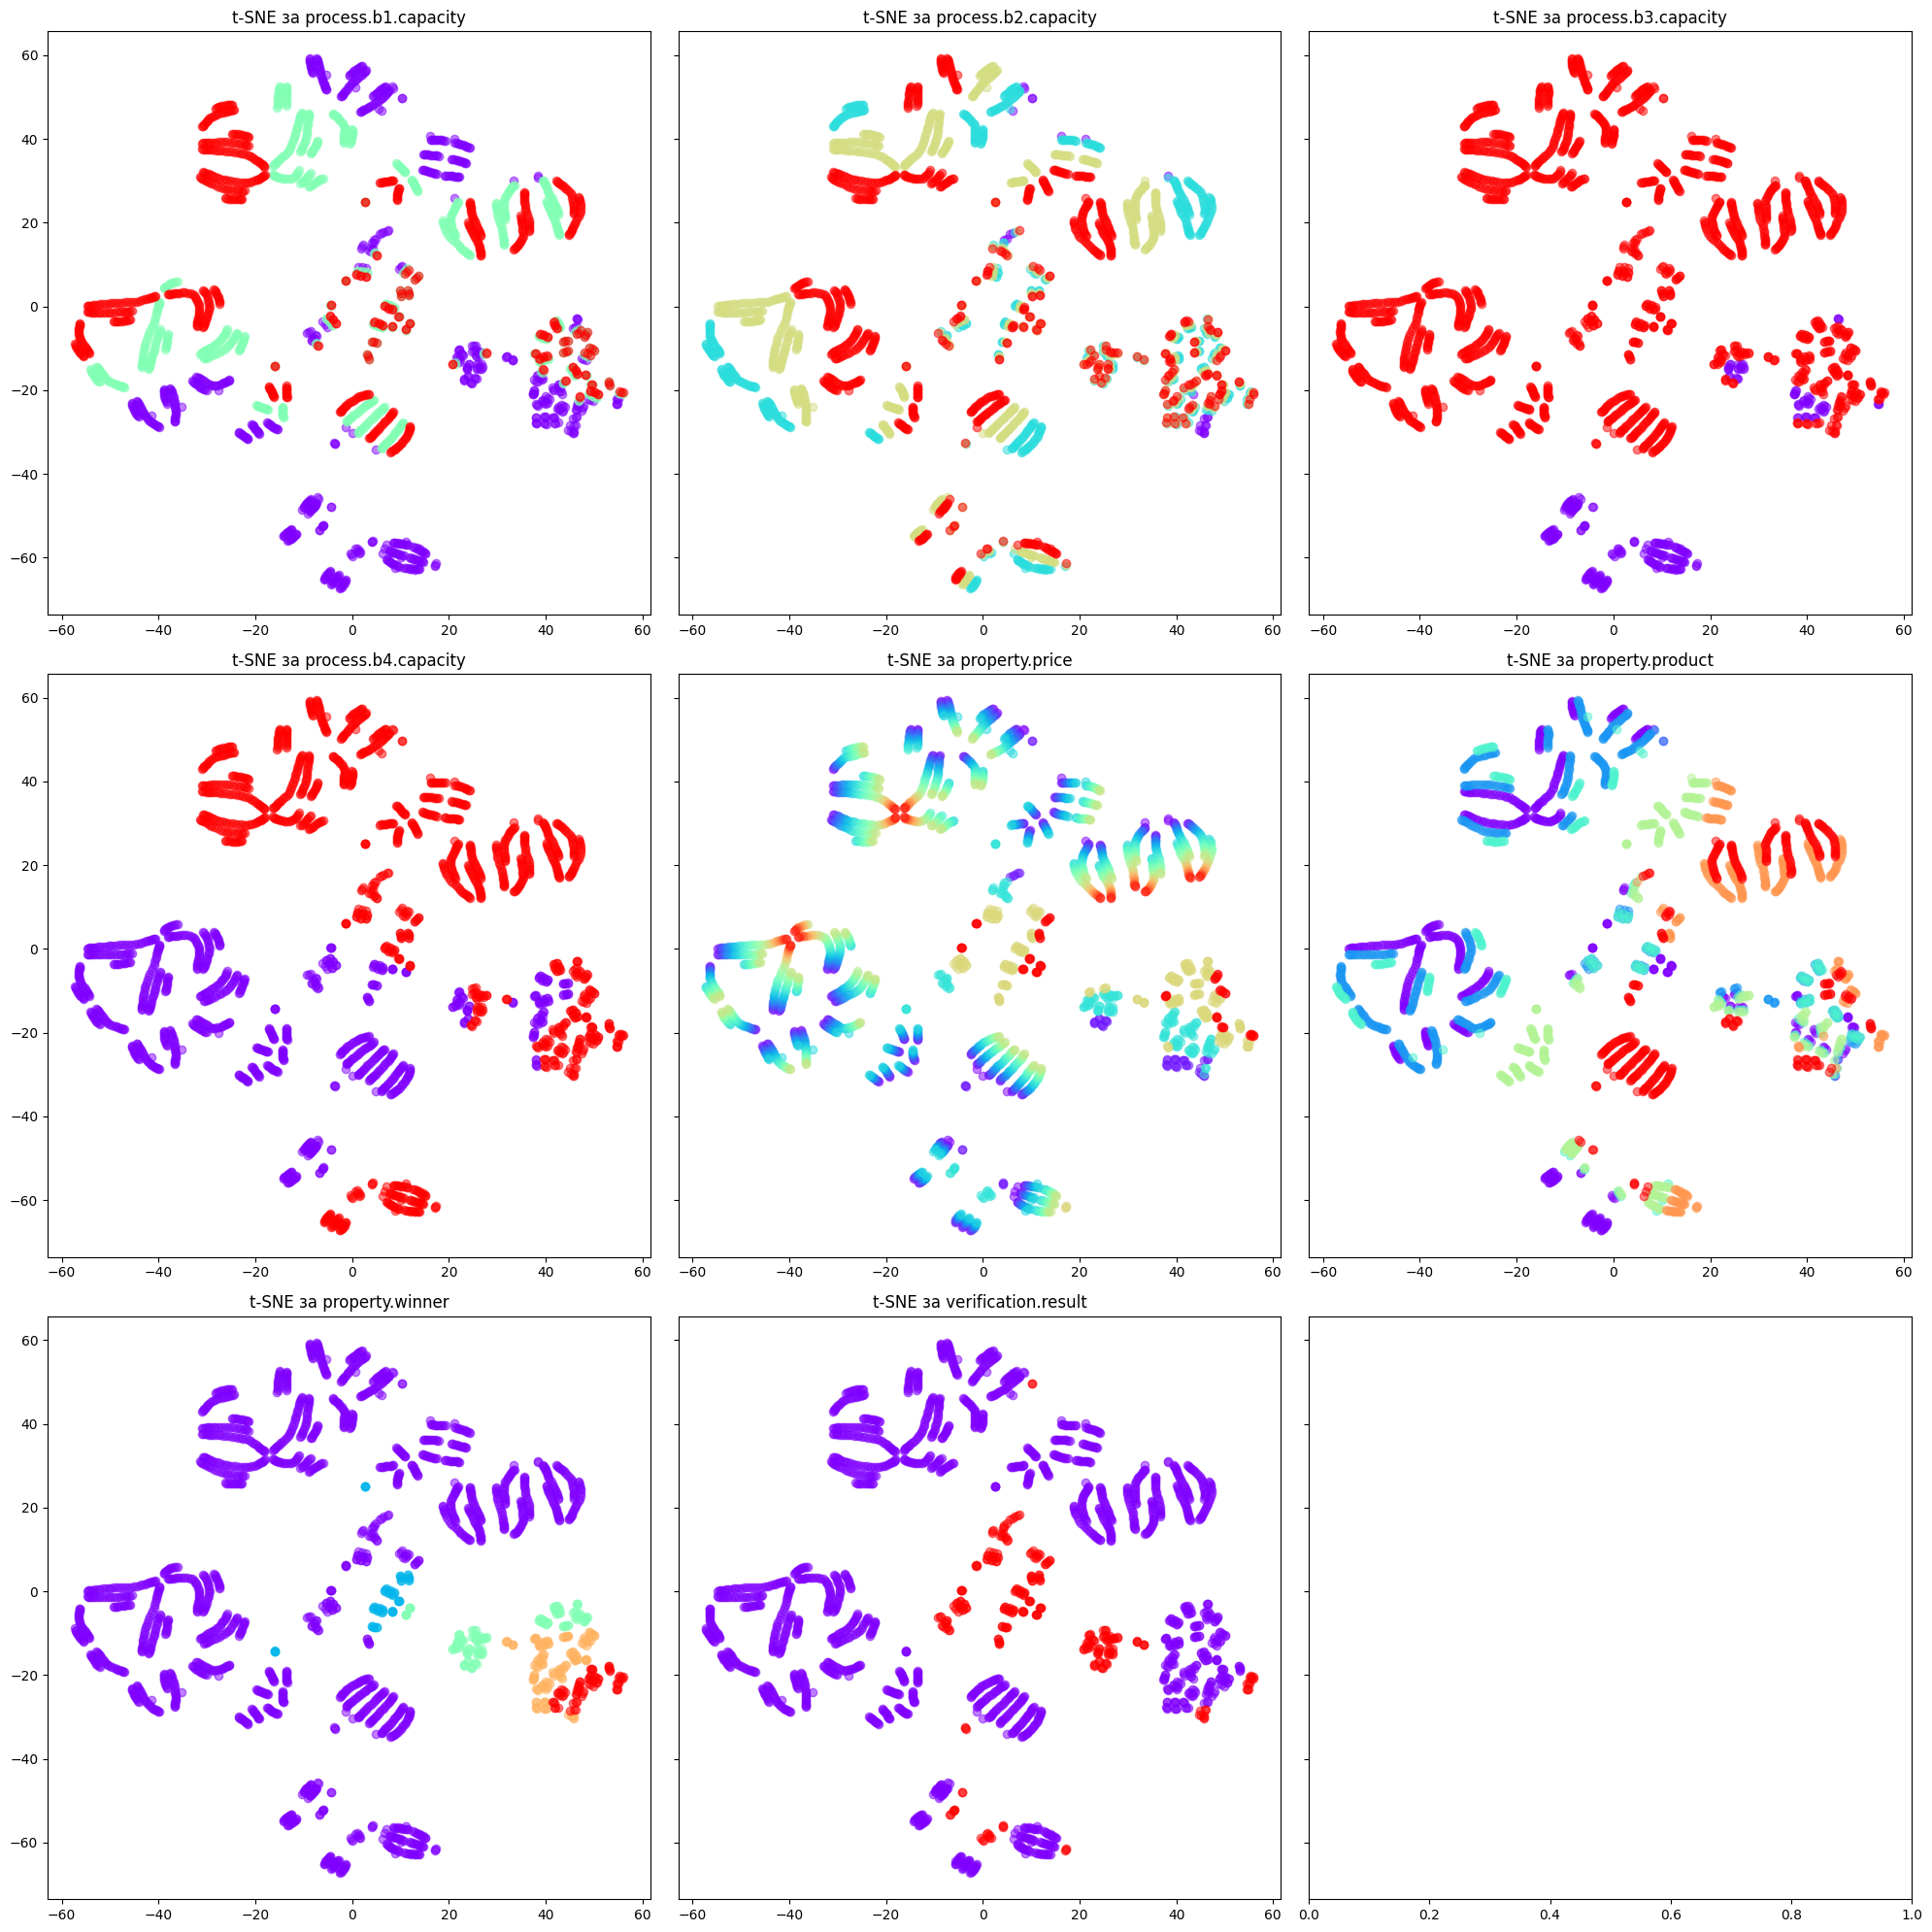

In [20]:
repr_df_by_tsne(df, tsne_repr, rows=3, figsize=(20,20))

In [21]:
df = df_orig.copy()
target = df.pop(trgt)

In [22]:
# на цьому графіку ми можеммо подивитихсь на те які саме ознаки найбільш значущі для збільшення таргета.
# створимо нові ознаки з комбінацій найбільш значущих
df["capacity_sum"] = df["process.b1.capacity"] + df["process.b2.capacity"] + df["process.b3.capacity"] + df["process.b4.capacity"]
df["price_per_product"] = df["property.price"] / df["property.product"]
# df["product_per_winner"] = df["property.product"] / (df["property.winner"] + 0.00001)
df.drop(columns=["property.winner", "property.product"], inplace=True)

In [23]:
# df["capacity_sum"] = np.log1p(df["process.b1.capacity"] + df["process.b2.capacity"] + df["process.b3.capacity"] + df["process.b4.capacity"])
# df["price_product"] = np.log1p(df["property.price"]) / np.log1p(df["property.product"] +0.00001)
# df["result_winner"] = df["capacity_sum"] / ((df["property.winner"] + 0.00001) **2)
# df["winner_sum"] = df["property.winner"] / df["capacity_sum"]
# df["winner_pow_price"] = df["price_product"].pow(df["price_product"])
# df.drop(columns=["process.b1.capacity", "process.b2.capacity", "process.b3.capacity", "process.b4.capacity"], inplace=True)

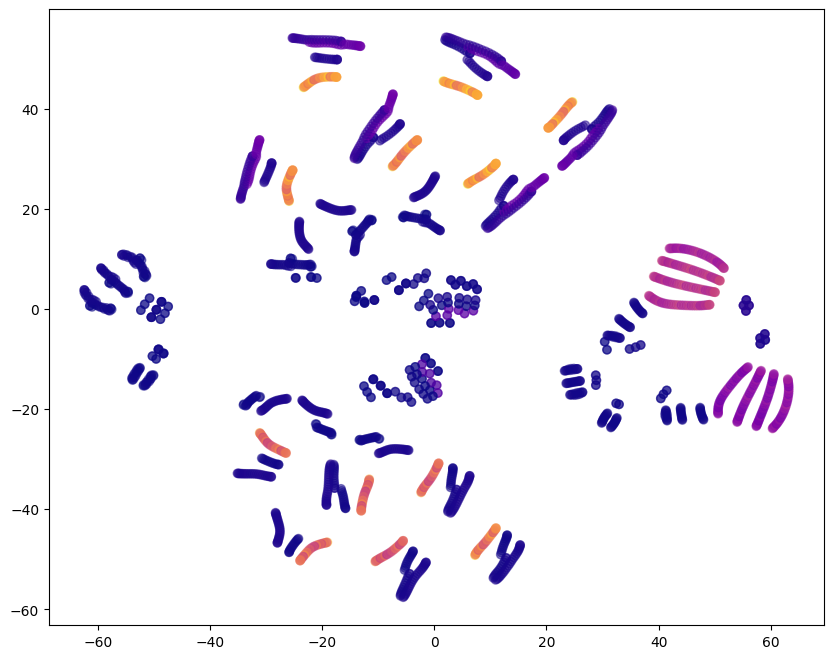

In [24]:
fetures = df

scaler = RobustScaler()
fetures_scaled = scaler.fit_transform(fetures)
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(fetures_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=target, cmap='plasma', alpha=0.5)



In [25]:
# погравшись із створенням нових ознак, видаленням старих, я вирішив залишити поточну комбінацію, так як вона має найменше перекриття таргетів з ріщними значеннями
#та на ній можна виділити 4-6 окремих групи із своїми наборами значень таргету. Тобто вона здається найбільш зрозумілою з точки зору логіки


In [26]:
def plot_results(p, y):

    # Перетворюємо на NumPy масиви
    y_np = np.array(y)
    y_pred_np = np.array(p)

    # Отримуємо індекси сортування 
    sorted_indices = np.argsort(y_np)

    # Сортуємо y_full_test і y_pred відповідно до індексів сортування
    y_sorted = y_np[sorted_indices]
    y_pred_sorted = y_pred_np[sorted_indices]
    plt.figure(figsize=(30, 10))

    # Лінія через передбачені точки
    plt.plot(y_pred_sorted, label='Передбачені значення', color='b', linestyle='-', marker='o')

    # Точки для фактичних значень 
    plt.scatter(range(len(y)), y_sorted, color='r', label='Фактичні значення', alpha=0.7)

    plt.xlabel('Індекс зразка')
    plt.ylabel('Значення')
    plt.title('Порівняння передбачених і фактичних значень')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split
# target = np.log1p(target)  # якщо застосовується цей рядок, потрібно перед отриманням результату обратно підняту у ступінь
X_train, X_test, y_train, y_test = train_test_split(fetures, target, test_size=0.15, random_state=42, shuffle=True)

In [28]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
rf_default_res = rf_reg_model.predict(X_test)
rf_default_r2 = r2_score(y_pred=rf_default_res, y_true=y_test)
rf_default_mse = mean_squared_error(y_pred=rf_default_res, y_true=y_test)
print(f"rf_default_r2: {rf_default_r2}\nrf_default_mse: {rf_default_mse}")

results_dict["random_forest_default"] = rf_default_r2

# mse у даному випадку виглядає страшним, але потрібно брати до уваги розліт значень таргету. Якщо привести значення таргета до натурального логарифму,
# mse становить 0.09  але при цьому r2 знижується до 0.96, що обумовлено більш щільним розподілом значень таргета

rf_default_r2: 0.9919546408936801
rf_default_mse: 833186.2857456824


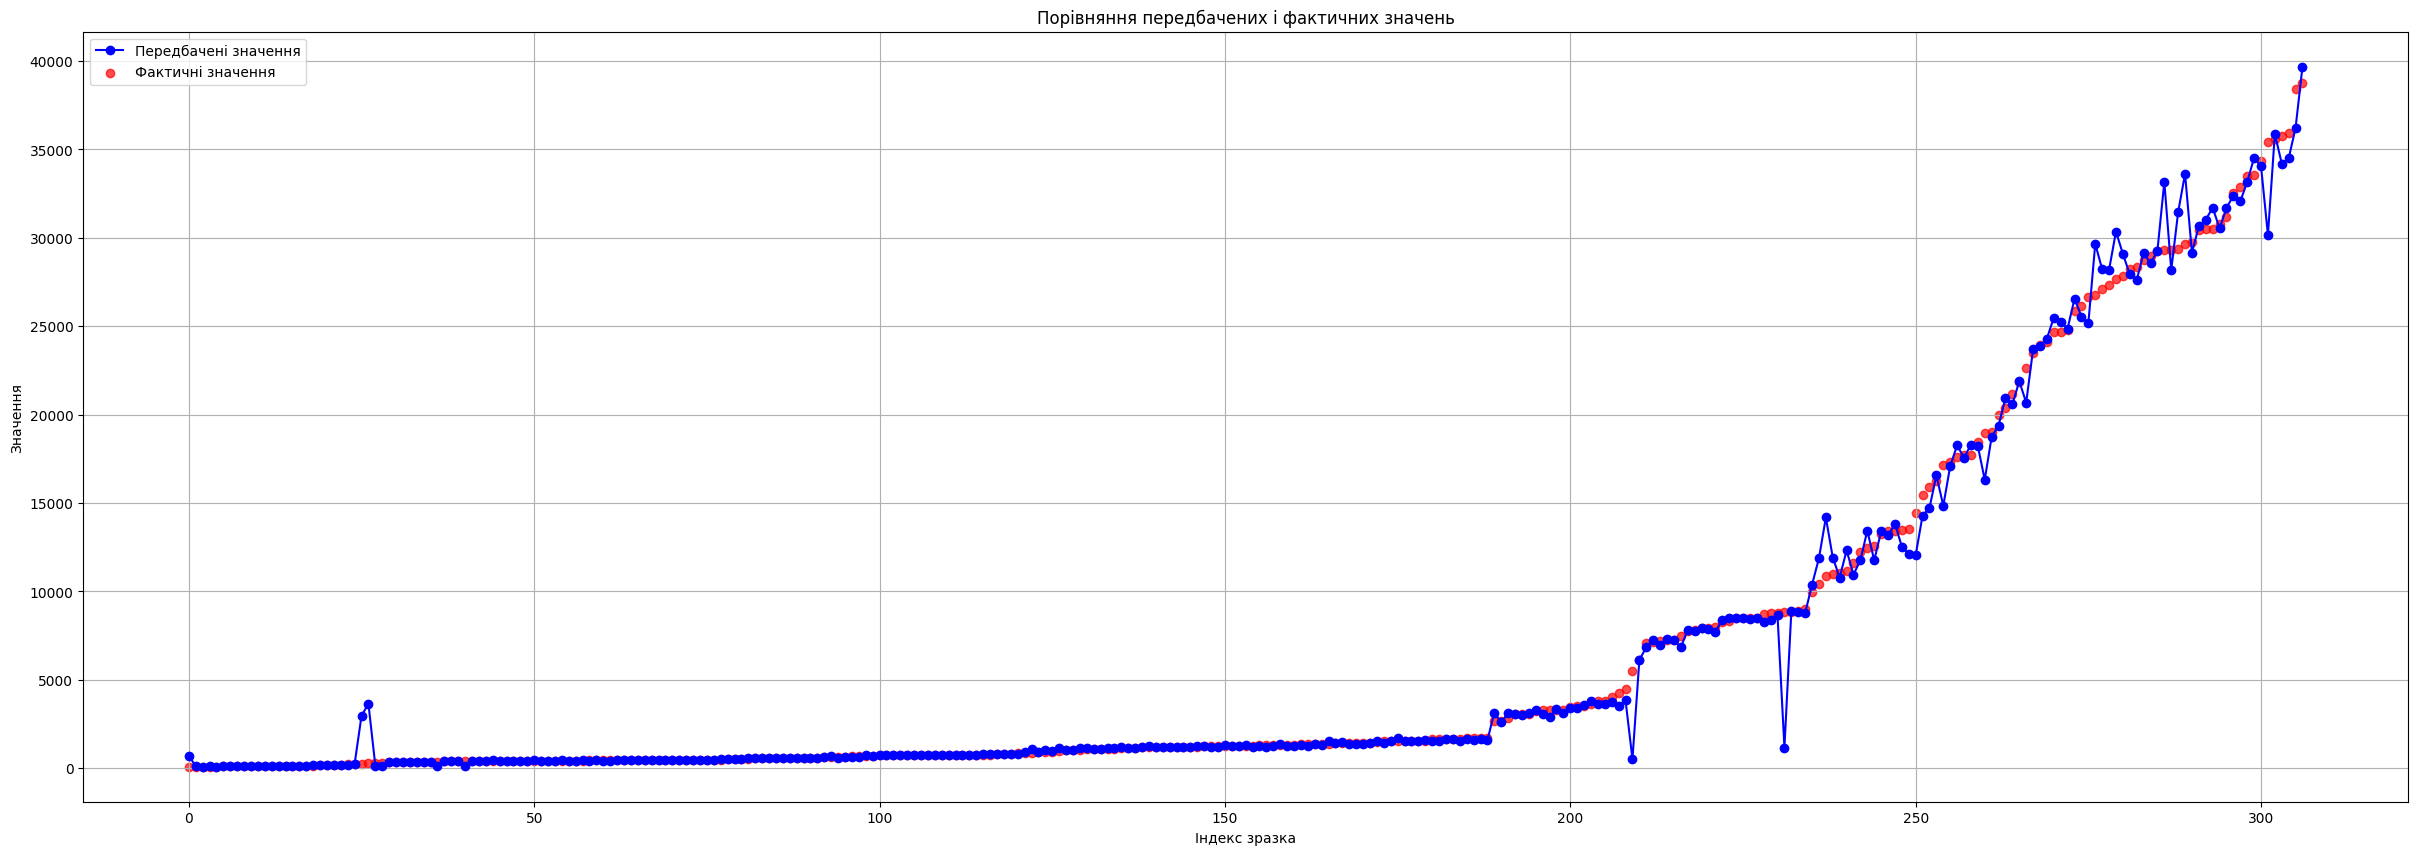

In [30]:
plot_results(rf_default_res, y_test)

In [31]:
# покрутимо гіперпараметри для RandomForest. Так як у нас виявились досить потужні проблеми з mse - для експеременту спробуємо привести до мінімуму саме його
# хоча тримаємо в голові що враховуючи діапазон даних - це не так важливо як r2

from sklearn.model_selection import GridSearchCV
rf_reg_non_default_model = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200], 
    # 'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],  # Дефолтне: "squared_error", додаємо інші доступні варіанти
    'max_depth': [None, 4],
    'min_samples_split': [2, 3], 
    'min_samples_leaf': [1, 2],  
    'min_weight_fraction_leaf': [0.0, 0.01], 
    'max_leaf_nodes': [None, 10],
    'min_impurity_decrease': [0.0, 0.1],
    'oob_score': [False, True],
    'warm_start': [False, True], 
    'ccp_alpha': [0.0, 0.01],
    'max_samples': [None, 0.5],
}


g_search = GridSearchCV(estimator=rf_reg_non_default_model, param_grid=param_grid, cv=4, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)


In [32]:
g_search.fit(X_train, y_train)

print("Найкращі параметри: ", g_search.best_params_)
print("Найкращий результат mse: ", g_search.best_score_)

# Використовуємо найкращу модель для передбачення
best_model = g_search.best_estimator_   

Fitting 4 folds for each of 2048 candidates, totalling 8192 fits


[CV] END ccp_alpha=0.0, max_depth=None, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, oob_score=False, warm_start=True; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=None, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, oob_score=False, warm_start=True; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=None, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, oob_score=False, warm_start=False; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=None, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, oob_score=False, warm_start=False; total time=   0.9s
[CV] E

rf_grid_r2: 0.9922228543835424
rf_grid_mse: 805409.8001405033


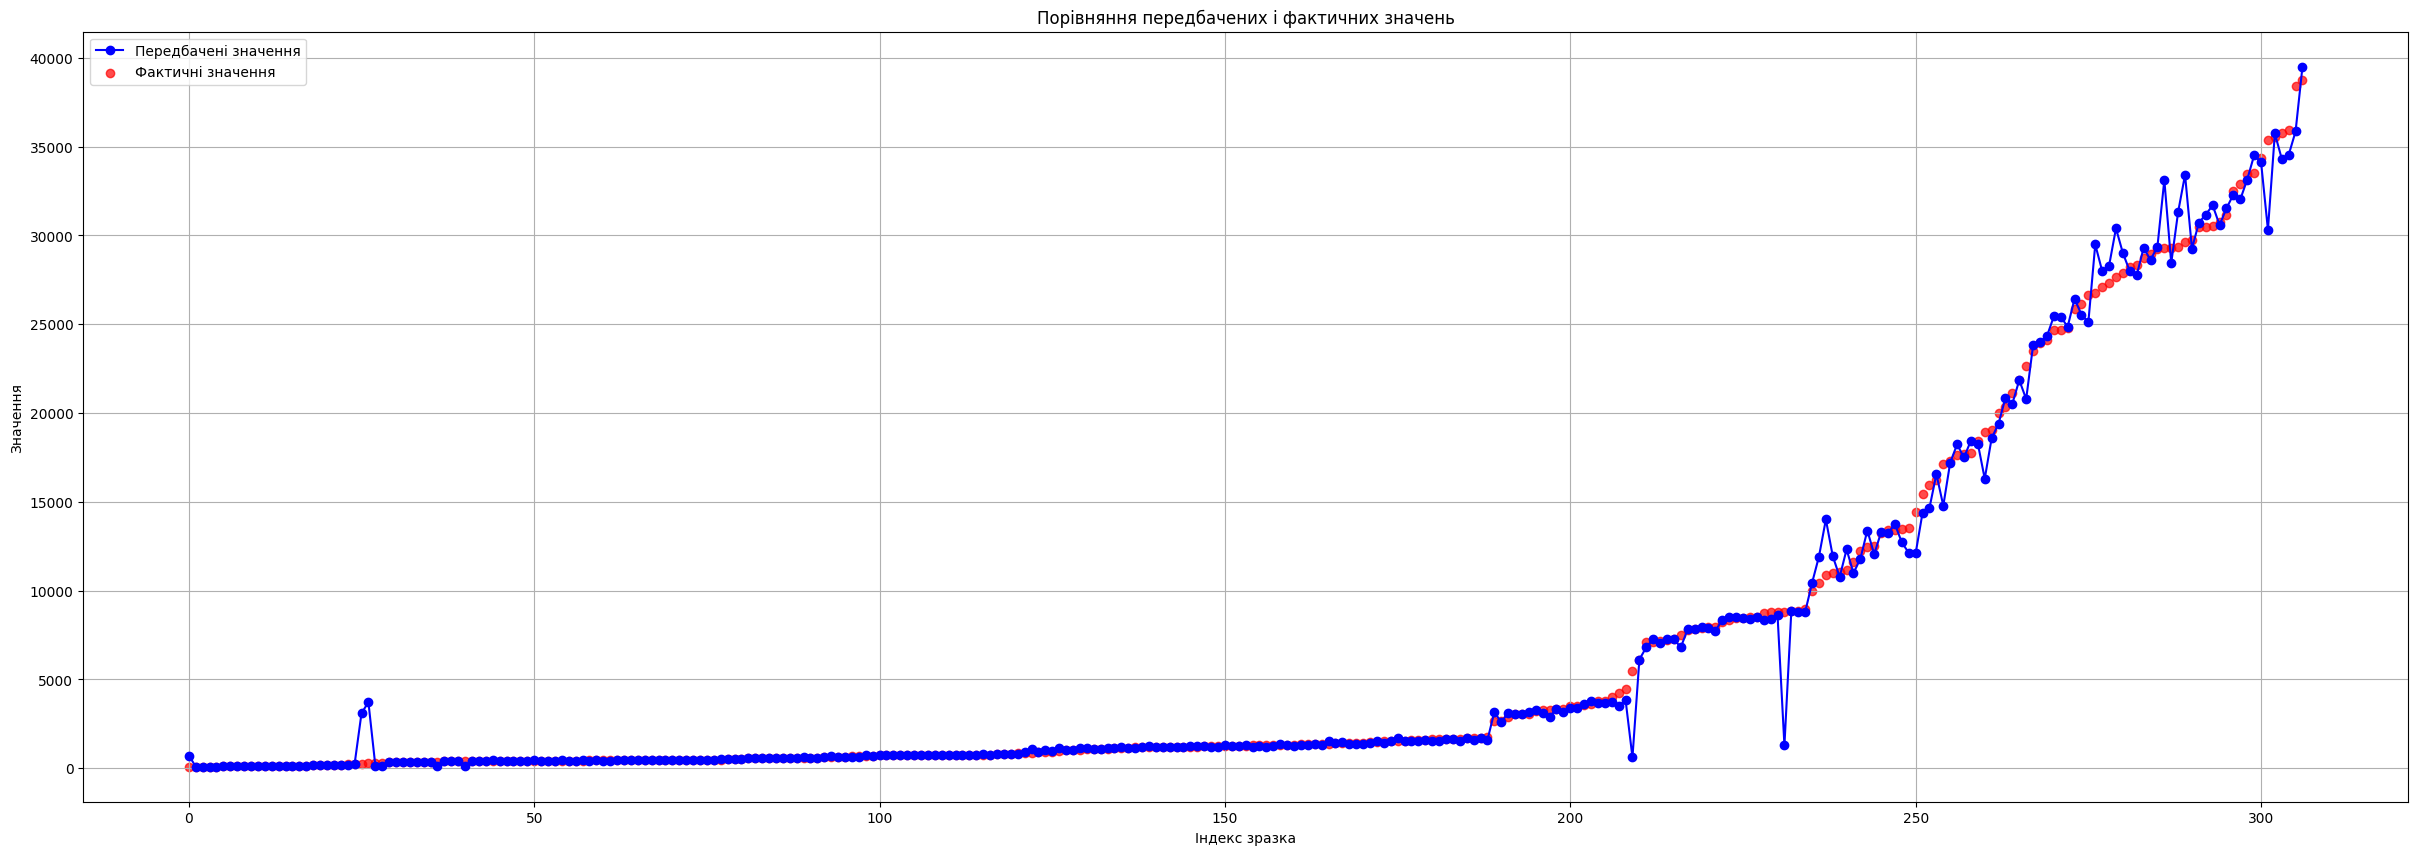

In [33]:
rf_grid_res = best_model.predict(X_test)
rf_grid_r2 = r2_score(y_pred=rf_grid_res, y_true=y_test)
rf_grid_mse = mean_squared_error(y_pred=rf_grid_res, y_true=y_test)
print(f"rf_grid_r2: {rf_grid_r2}\nrf_grid_mse: {rf_grid_mse}")
plot_results(rf_grid_res, y_test)

results_dict["random_forest_best"] = rf_grid_r2

In [34]:
# перебором вдалось незначно покращити показник mse та, як наслідок r2. вибірка для перебору параметрів занадто мала, але вцілому, особливо поліпшувати результати вде немає куди


In [35]:
# bagging

In [36]:
def get_results(p, y) -> dict:
    data_dict = dict()
    data_dict["r2"] = r2_score(y_pred=p, y_true=y)
    data_dict["mse"] = mean_squared_error(y_pred=p, y_true=y)
    return data_dict

In [37]:
from sklearn.neighbors import KNeighborsRegressor
# враховуючи наш розподіл даних на tsne репрезентації та завелику дискретність ознак буде правильно обрати KNNRegresson ніж наприклад LinearRegression 
knn_default_model = KNeighborsRegressor()

knn_default_model.fit(X_train, y_train)


KNeighborsRegressor()

{'r2': 0.872033586019924, 'mse': np.float64(13252343.339217873)}


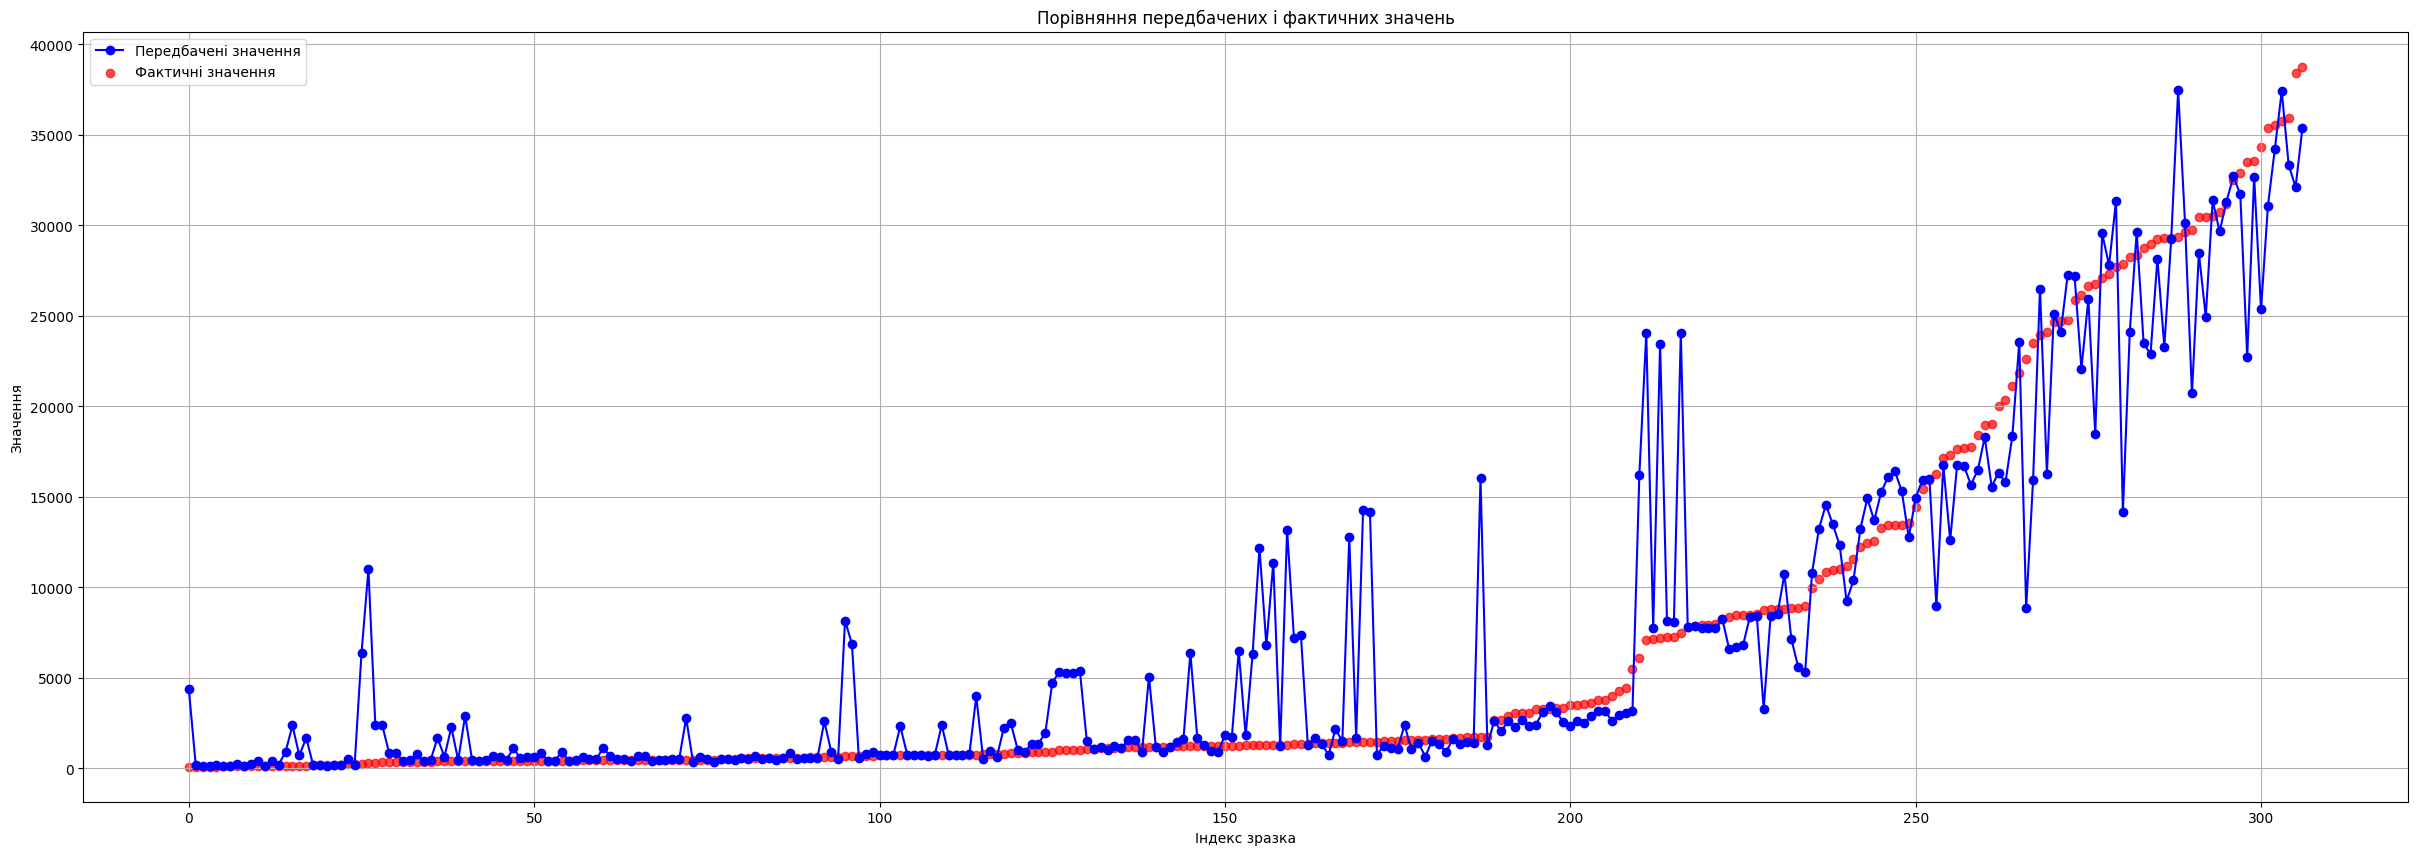

In [38]:
knn_default_res = knn_default_model.predict(X_test)

metrics = get_results(knn_default_res, y_test)
print(metrics)
plot_results(knn_default_res, y_test)

results_dict["KNN_default"] = metrics["r2"]

In [39]:
# бачимо, що на стандартних параметрах KNNRegressor працює відчутно слабше ніж RandomForest

In [40]:
# спочатку переберемо параметри для KNNRegressor, ми не будемо використовувати саму модель, але це цікаво для порівняння

knn_grid_model = KNeighborsRegressor(n_jobs=-1)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Вибір кількості сусідів, додані більше варіанти для різноманітності
    'weights': ['uniform', 'distance'],  # Тип вагів
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Додано різні алгоритми для підбору найближчих сусідів
    'leaf_size': [10, 30, 50],  # Розмір листка для алгоритмів 'ball_tree' та 'kd_tree'
    'p': [1, 2, 3]  # Манхеттенська, Евклідова, та Мінковська відстань
}

g_search_knn = GridSearchCV(estimator=knn_grid_model, param_grid=param_grid, cv=6, n_jobs=-1, scoring='r2', verbose=2)
g_search_knn.fit(X_train, y_train)




Fitting 6 folds for each of 432 candidates, totalling 2592 fits
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; t

GridSearchCV(cv=6, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 15], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=2)

Найкращі параметри:  {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Найкращий результат r2:  0.9055753823690943


{'r2': 0.9013453159563772, 'mse': np.float64(10216788.173588328)}


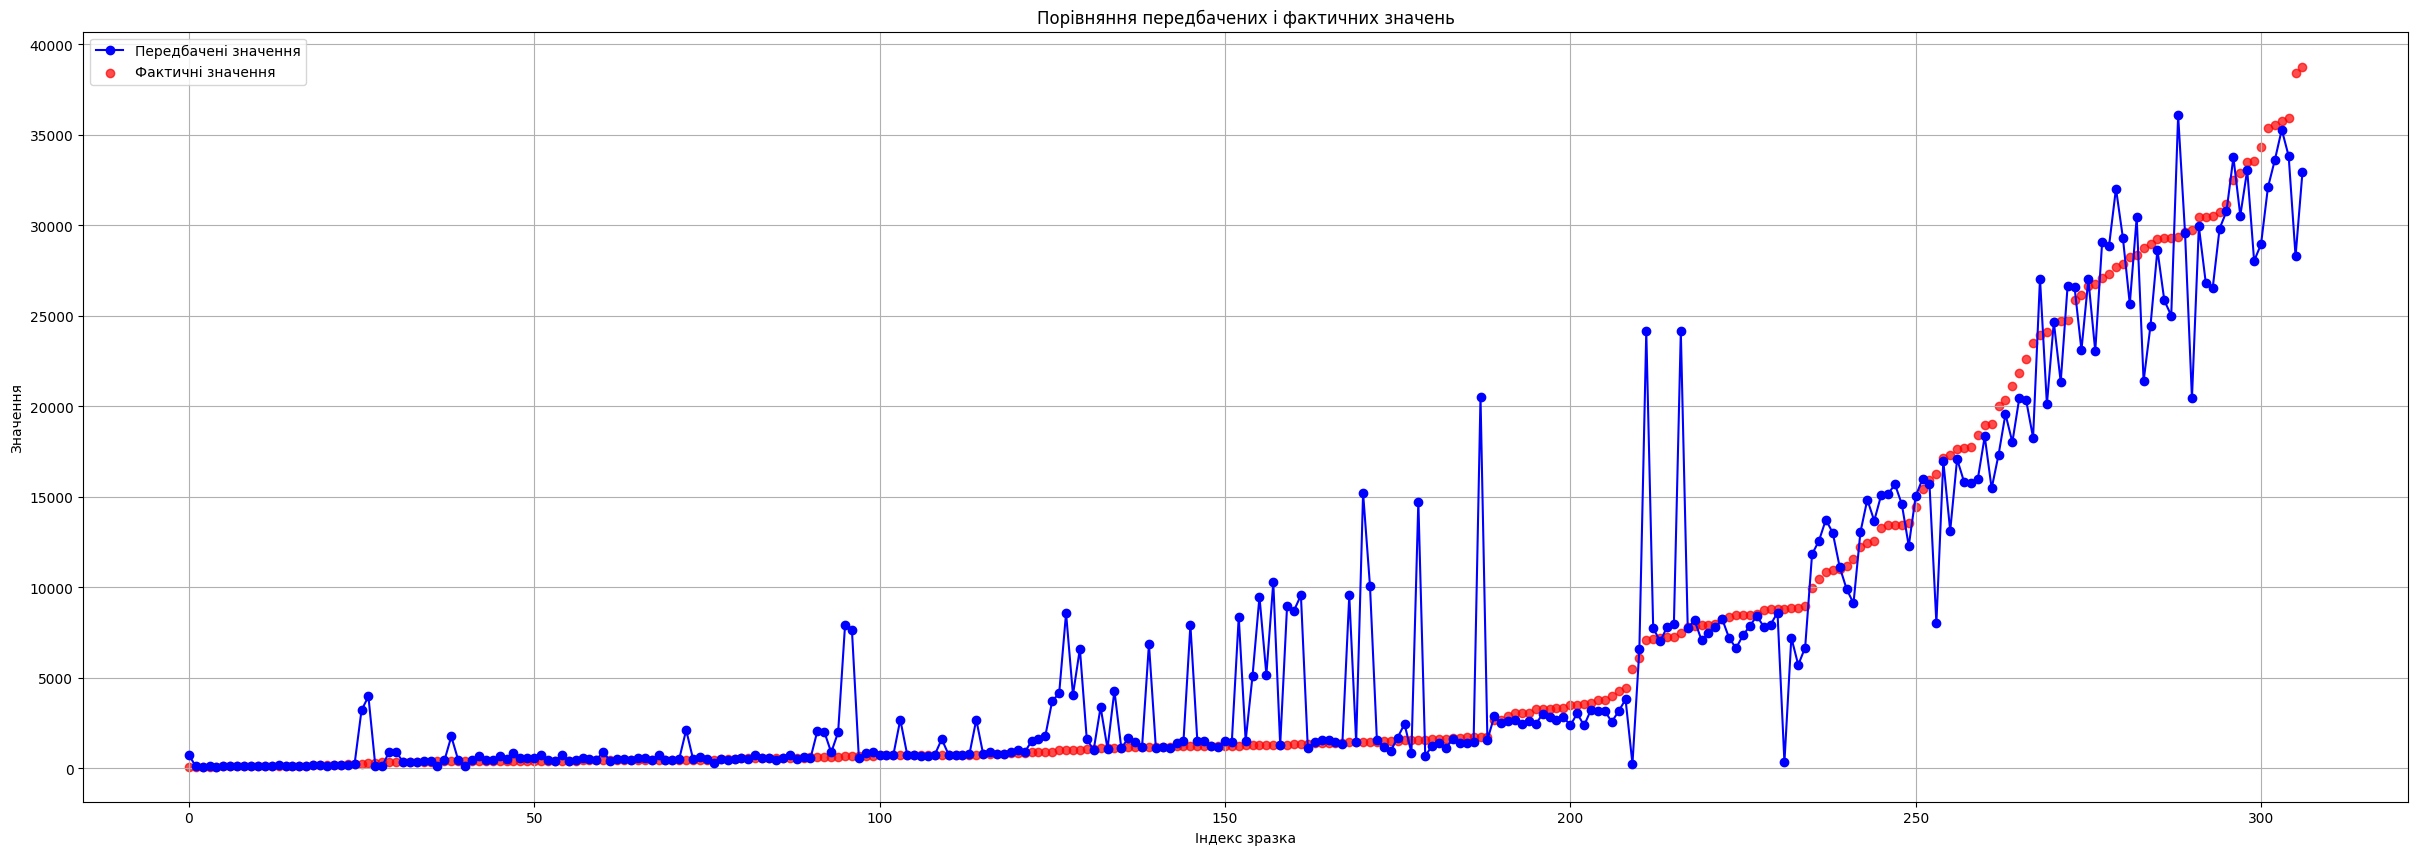

In [41]:
print("Найкращі параметри: ", g_search_knn.best_params_)
print("Найкращий результат r2: ", g_search_knn.best_score_)

# Використовуємо найкращу модель для передбачення
best_knn_model = g_search_knn.best_estimator_  

knn_grid_res = best_knn_model.predict(X_test)
metrics = get_results(knn_grid_res, y_test)
print(metrics)
plot_results(knn_grid_res, y_test)
# нам трохи вдалось покращити результати, але до randomForest все щє далеко

results_dict["KNN_best"] = metrics["r2"]

{'r2': 0.8814307642848794, 'mse': np.float64(12279161.166539231)}


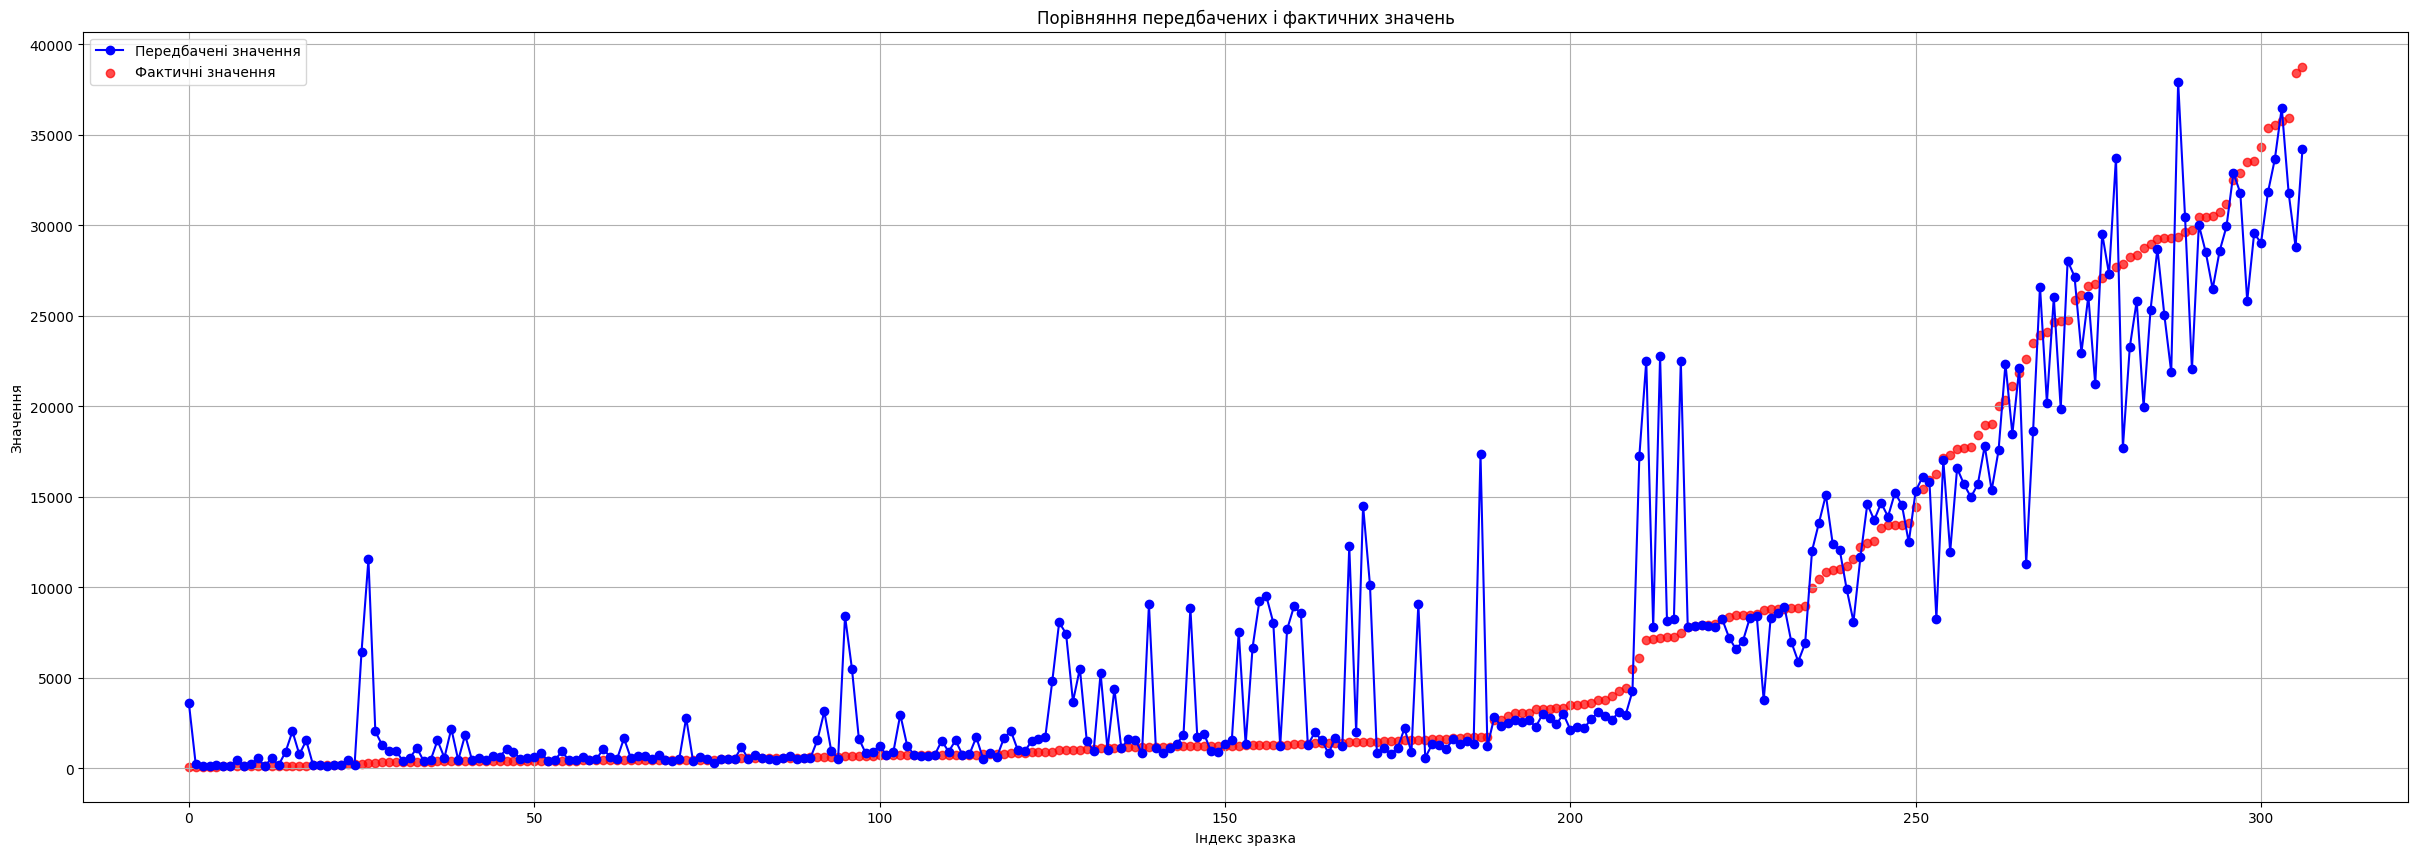

In [42]:
from sklearn.ensemble import BaggingRegressor
bagging_default_model = BaggingRegressor(estimator=KNeighborsRegressor(), random_state=42)

bagging_default_model.fit(X_train, y_train)

bagging_default_res = bagging_default_model.predict(X_test)
metrics = get_results(bagging_default_res, y_test)
print(metrics)
plot_results(bagging_default_res, y_test)

results_dict["Bagging_knn_default"] = metrics["r2"]
# бачимо, що вцілому BaggingRegressor показав трохи кращий результат ніж дефолтна модель KNNReg і гірший ніж таж модель з подібраними параметрами

In [43]:
bagging_grid_model = BaggingRegressor(estimator=KNeighborsRegressor(), random_state=42)

param_grid = {
    'n_estimators': [5, 10, 50, 100, 150],  
    'max_samples': np.linspace(.4, 1.0, 6), 
    'max_features': np.linspace(.6, 1.0, 4), 
    'oob_score': [False, True],  
    "bootstrap_features": [True, False],
    # 'warm_start': [False, True], 
}
# max_samples та max_features ставимо максимум на 70-80 % щоб забезпечити різноманітність даних. 
# Якщо поставити 100% - пошук обере саме цей варіант, але тоді не буде різноманітності даних і будемо мати надвисокий рівень перенавчання
# Найкращі параметри:  {'bootstrap_features': False, 'max_features': np.float64(0.7), 'max_samples': np.float64(0.8), 'n_estimators': 10, 'oob_score': False}
# Найкращий результат r2:  0.7271358770596366
# {'r2': 0.7476205982729155, 'mse': np.float64(26136689.928299993)}

# ок дозволимо використати усі фічі
# Найкращі параметри:  {'bootstrap_features': False, 'max_features': np.float64(1.0), 'max_samples': np.float64(0.8), 'n_estimators': 100, 'oob_score': False}
# Найкращий результат r2:  0.8577867460494422
# {'r2': 0.8813084098011827, 'mse': np.float64(12291832.332172533)}
# стало значно кращє, але все щє гірше звичайної KNN з підбором гіперпараметрів. 

# спробуємо дозволити використовувати усі рядки, але не зрозуміло нащо... Тоді буде просто купа копій однієї моделі, через відсутність різноманітності даних
# Найкращі параметри:  {'bootstrap_features': False, 'max_features': np.float64(1.0), 'max_samples': np.float64(1.0), 'n_estimators': 150, 'oob_score': False}
# Найкращий результат r2:  0.8660035569714625
# {'r2': 0.8852038665227446, 'mse': np.float64(11888414.526425151)}
# як бачимо нам не вдалось покращити результати найкращої KNN моделі, вдалось лише несуттєво покращити попередній результат
g_search_bagging = GridSearchCV(estimator=bagging_grid_model, param_grid=param_grid, cv=6, n_jobs=-1, scoring='r2', verbose=2)
g_search_bagging.fit(X_train, y_train)

Fitting 6 folds for each of 480 candidates, totalling 2880 fits
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_s

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=Tr

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=Tr

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_fea

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstra

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.5s[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.5s

[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstra

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_feat

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_feature

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, m

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, m

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, m

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_fea

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_featu

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_fe

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, ma

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.3s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, ma

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.6s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_feat

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s



/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_f

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   3.0s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   3.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstr

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.3s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.3s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.3s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   3.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=True, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_fea

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstr

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END boot

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END b

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstr

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END 

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.6, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootst

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, 

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=Fals

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=Fa

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   3.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.5s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=0.7333333333333333, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, 

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.2s
[CV] END bootstrap_features=False

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=Fal

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=F

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.3s
[CV] END bootstrap_features=Fa

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, m

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.4s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=0.8666666666666667, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, m

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_f

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootst

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.52, n_estimators=150, oob_score=True; total time=   2.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END boo

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.7s[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.5s

[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.64, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.5s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=False; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.76, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END 

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.6s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.7s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.8s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=0.88, n_estimators=150, oob_score=True; total time=   2.9s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.5s
[CV] END bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=50, oob_score=False; total time=   0.6s
[CV] END bootstra

GridSearchCV(cv=6,
             estimator=BaggingRegressor(estimator=KNeighborsRegressor(),
                                        random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap_features': [True, False],
                         'max_features': array([0.6       , 0.73333333, 0.86666667, 1.        ]),
                         'max_samples': array([0.4 , 0.52, 0.64, 0.76, 0.88, 1.  ]),
                         'n_estimators': [5, 10, 50, 100, 150],
                         'oob_score': [False, True]},
             scoring='r2', verbose=2)

Найкращі параметри:  {'bootstrap_features': False, 'max_features': np.float64(1.0), 'max_samples': np.float64(1.0), 'n_estimators': 150, 'oob_score': False}
Найкращий результат r2:  0.8660035569714625
{'r2': 0.8852038665227446, 'mse': np.float64(11888414.526425151)}


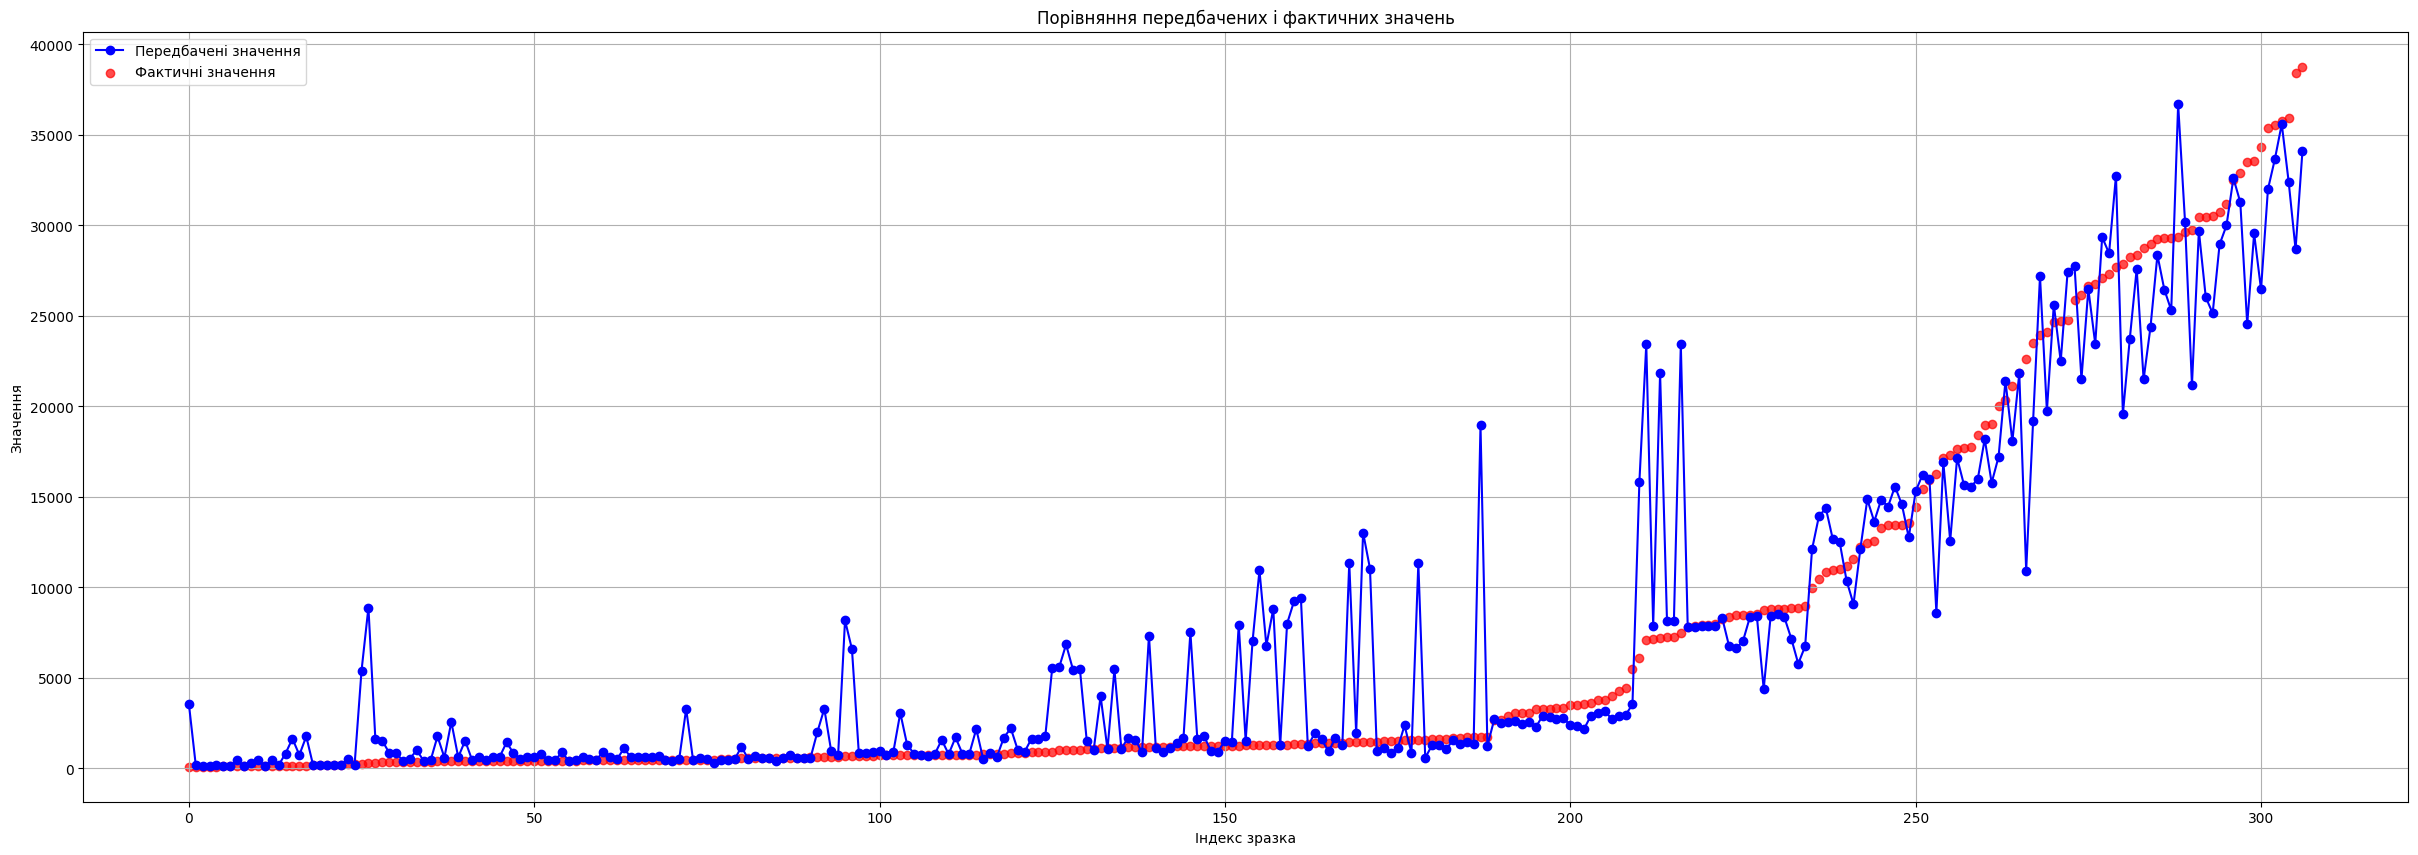

In [44]:
print("Найкращі параметри: ", g_search_bagging.best_params_)
print("Найкращий результат r2: ", g_search_bagging.best_score_)

# Використовуємо найкращу модель для передбачення
best_bagging_model = g_search_bagging.best_estimator_  

bagging_grid_res = best_bagging_model.predict(X_test)
metrics = get_results(bagging_grid_res, y_test)
print(metrics)
plot_results(bagging_grid_res, y_test)

results_dict["Bagging_knn_best"] = metrics["r2"]
# Ось цей момент в роботі GridSearch мені максималььно не зрозумілий: в param_grid вписані в тому числі і дефолтні параметри. Як ми можемо отримуваати гірший результат

In [45]:
# В цілому картина виглядає набагато слабшою ніж з randomForest. Можливо, варто було б розділити даніна 2 датасети: 
# з малими значеннями та з великими (там де графік починає швидко зростати). Навчити модель класифікації розрізняти дані за структурою, і на
# основі її предікту запускати вже модель або до лівої частини графіку або до правої(де він стрімко зростає).
# В такому випадку KNN могла б точніше вимірювати відстані між точками

In [46]:
# швидко підтвердимо що лінійна регресія явно гірше працює з нашими даними
import statsmodels.api as sm
scaler = MinMaxScaler()
X_train_scaled = sm.add_constant(scaler.fit_transform(X_train))
X_test_scaled = sm.add_constant(scaler.transform(X_test))
y_train_scaled, y_test_scaled = map(np.log1p, [y_train, y_test])



In [47]:
from sklearn.linear_model import LinearRegression
linear_default_model = LinearRegression()
linear_default_model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

{'r2': 0.5082063278387431, 'mse': np.float64(1.4110764927285568)}


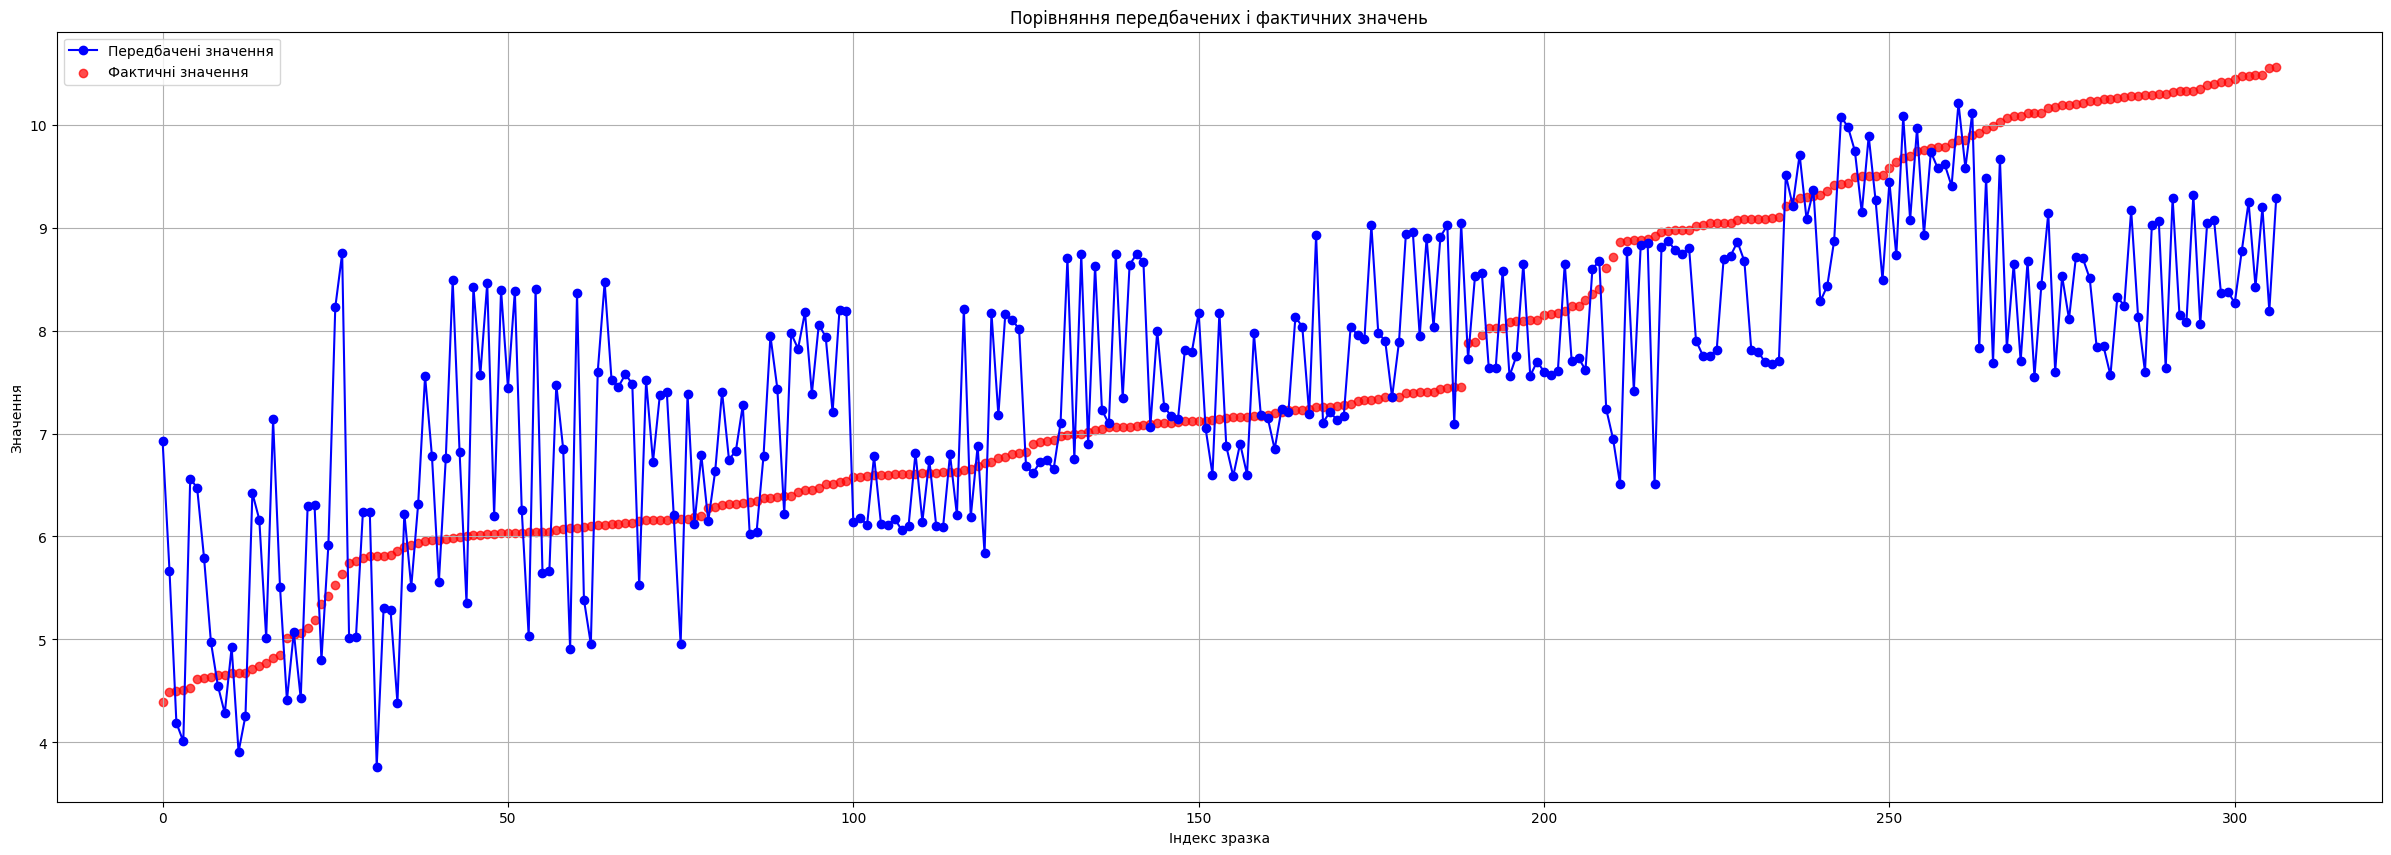

In [48]:
linear_def_res = linear_default_model.predict(X_test_scaled)

metrics = get_results(linear_def_res, y_test_scaled)
print(metrics)
plot_results(linear_def_res, y_test_scaled)

results_dict["linear_reg_default"] = metrics["r2"]

In [49]:
bagging_linear_grid_model = BaggingRegressor(estimator=LinearRegression(), random_state=42)

param_grid = {
    'n_estimators': [5, 10, 50, 100, 150],  
    'max_samples': np.linspace(.4, .8, 4), 
    'max_features': np.linspace(.4, 1.0, 6), 
    'oob_score': [False, True],  

    # 'warm_start': [False, True], 
}

g_search_linear_bagging = GridSearchCV(estimator=bagging_linear_grid_model, param_grid=param_grid, cv=6, n_jobs=-1, scoring='r2', verbose=2)
g_search_linear_bagging.fit(X_train_scaled, y_train_scaled)

Fitting 6 folds for each of 240 candidates, totalling 1440 fits
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=False; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=5, oob_score=True;

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.4, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=False; total time=   0.2s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=False; total time=   0.2s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=True; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=True; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=True; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=50, oob_score=False; total time=   0.2s
[CV] END max_features=0.4, max_sampl

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=100, oob_score=True; total time=   0.6s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s[CV] END max_features=0.4, max_samples=0.4, n_estimators=100, oob_score=True; total time=   0.7s

[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=100, oob_score=True; total time=   0.7s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s



/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=0.4, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=150, oob_score=False; total time=   0.7s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=150, oob_score=False; total time=   0.8s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=True; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=100, oob_score=False; total time=   0.5s
[CV] END max_features=0.4, max_samp

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.1s[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.1s

[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=100, oob_score=True; total time=   0.7s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=100, oob_score=True; total time=   0.7s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=150, oob_score=False; total time=   0.8s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=150, oob_score=False; total time=   0.9s
[CV] END max_features=0.4, max_samples=0.4, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=50, oob_score=True; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.2s
[CV] EN

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.4, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.4, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s

[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[C

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=100, oob_score=True; total time=   0.7s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.2s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.2s
[C

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.4, max_samples=0.8, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.4,

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=150, oob_score=False; total time=   0.8s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=0.52, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_sa

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.52, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; tota

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=False; total time=  

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.52, max_samples=0.8, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.52, max_samples=0.8, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_feat

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.64, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_s

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.2s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END max_features=0.64, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; to

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=False; total time=  

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.64, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.64, max_samples=0.8, n_estimators=50, oob_score=False;

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.6

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samp

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.76, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total ti

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.76, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=50, oob_score=False; total time=

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.76, max_samples=0.8, n_estimators=150, oob_score=True; total time=   0.9s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[C

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END max_features=0.88, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_featu

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total ti

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END max_features=0.88, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; tot

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=10, oob_score=True; total time=   0.2s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=0.88, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=50, oob_score=False;

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=0.88, max_samples=0.8, n_estimators=150, oob_score=True; total time=   1.1s[CV] END max_features=1.0, max_samples=0.4, n_estimators=10, oob_score=False; total time=   0.1s

[CV] END max_features=1.0, max_samples=0

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=10, oob_score=True; total time=   0.1s


/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.4, n_estimators=150, oob_score=True; total time=   1.3s
[CV] END max_features=1.0, max_sample

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=5, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=False; total time=   0.1s
[C

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=10, oob_score=True; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.2s
[CV] END max_features=1.0, max_samples=0.5333333333333333, n_estimators=150, oob_score=True; total time=   1.1

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.0s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=5, oob_score=True; total time=   0.0s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=10, oob_score=False; total time=   0.1s
[CV] END max_features=1.0

/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/dobriykot/HilelML/venv-ml/lib/

[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.1s
[CV] END max_features=1.0, max_samples=0.6666666666666667, n_estimators=150, oob_score=True; total time=   1.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.3s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=False; total time=   0.4s
[CV] END max_features=1.0, max_samples=0.8, n_estimators=50, oob_score=True; total

GridSearchCV(cv=6,
             estimator=BaggingRegressor(estimator=LinearRegression(),
                                        random_state=42),
             n_jobs=-1,
             param_grid={'max_features': array([0.4 , 0.52, 0.64, 0.76, 0.88, 1.  ]),
                         'max_samples': array([0.4       , 0.53333333, 0.66666667, 0.8       ]),
                         'n_estimators': [5, 10, 50, 100, 150],
                         'oob_score': [False, True]},
             scoring='r2', verbose=2)

Найкращі параметри:  {'max_features': np.float64(1.0), 'max_samples': np.float64(0.8), 'n_estimators': 100, 'oob_score': False}
Найкращий результат r2:  0.5506845750932626
{'r2': 0.50908009400577, 'mse': np.float64(1.4085694435975362)}


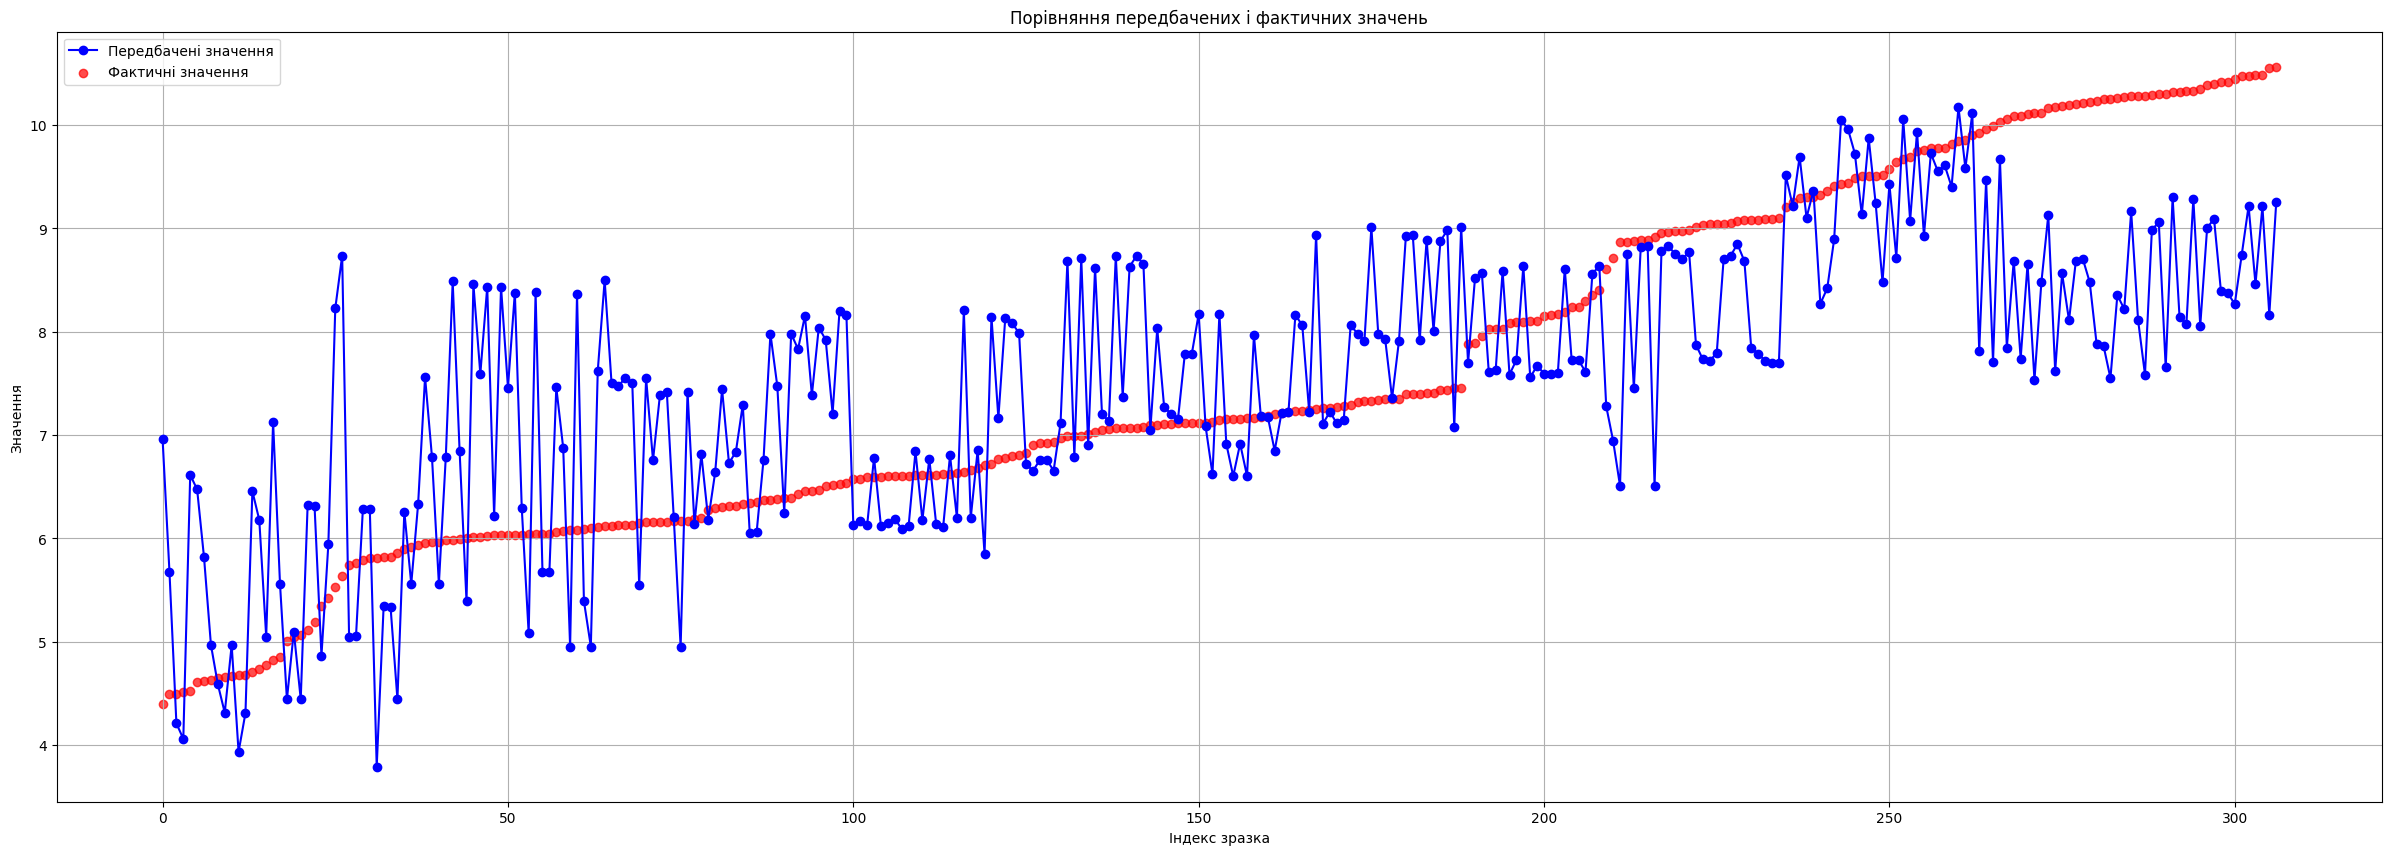

In [50]:
print("Найкращі параметри: ", g_search_linear_bagging.best_params_)
print("Найкращий результат r2: ", g_search_linear_bagging.best_score_)

# Використовуємо найкращу модель для передбачення
best_bagging_linear_model = g_search_linear_bagging.best_estimator_  

bagging_linear_grid_res = best_bagging_linear_model.predict(X_test_scaled)
metrics = get_results(bagging_linear_grid_res, y_test_scaled)
print(metrics)
plot_results(bagging_linear_grid_res, y_test_scaled)

results_dict["Bagging_best_linear"] = metrics["r2"]

In [51]:
# як бачимо, наші дані явно не пригодні для роботи з моделлю лінійної регресії. Можна було б витратити дуже багато часу на пошуки нелінійних залежностей
# масштабування їх до лінійних, на зменшення дискретності даних, розбивання датасету на частини, тощо
# але якщо сама природа даних проситься працювати з деревами рішень, то нащо цей біль

In [52]:
# boosting
import lightgbm as lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 8
[LightGBM] [Info] Start training from score 7424.271176
{'r2': 0.994868199025075, 'mse': np.float64(531454.9837962026)}


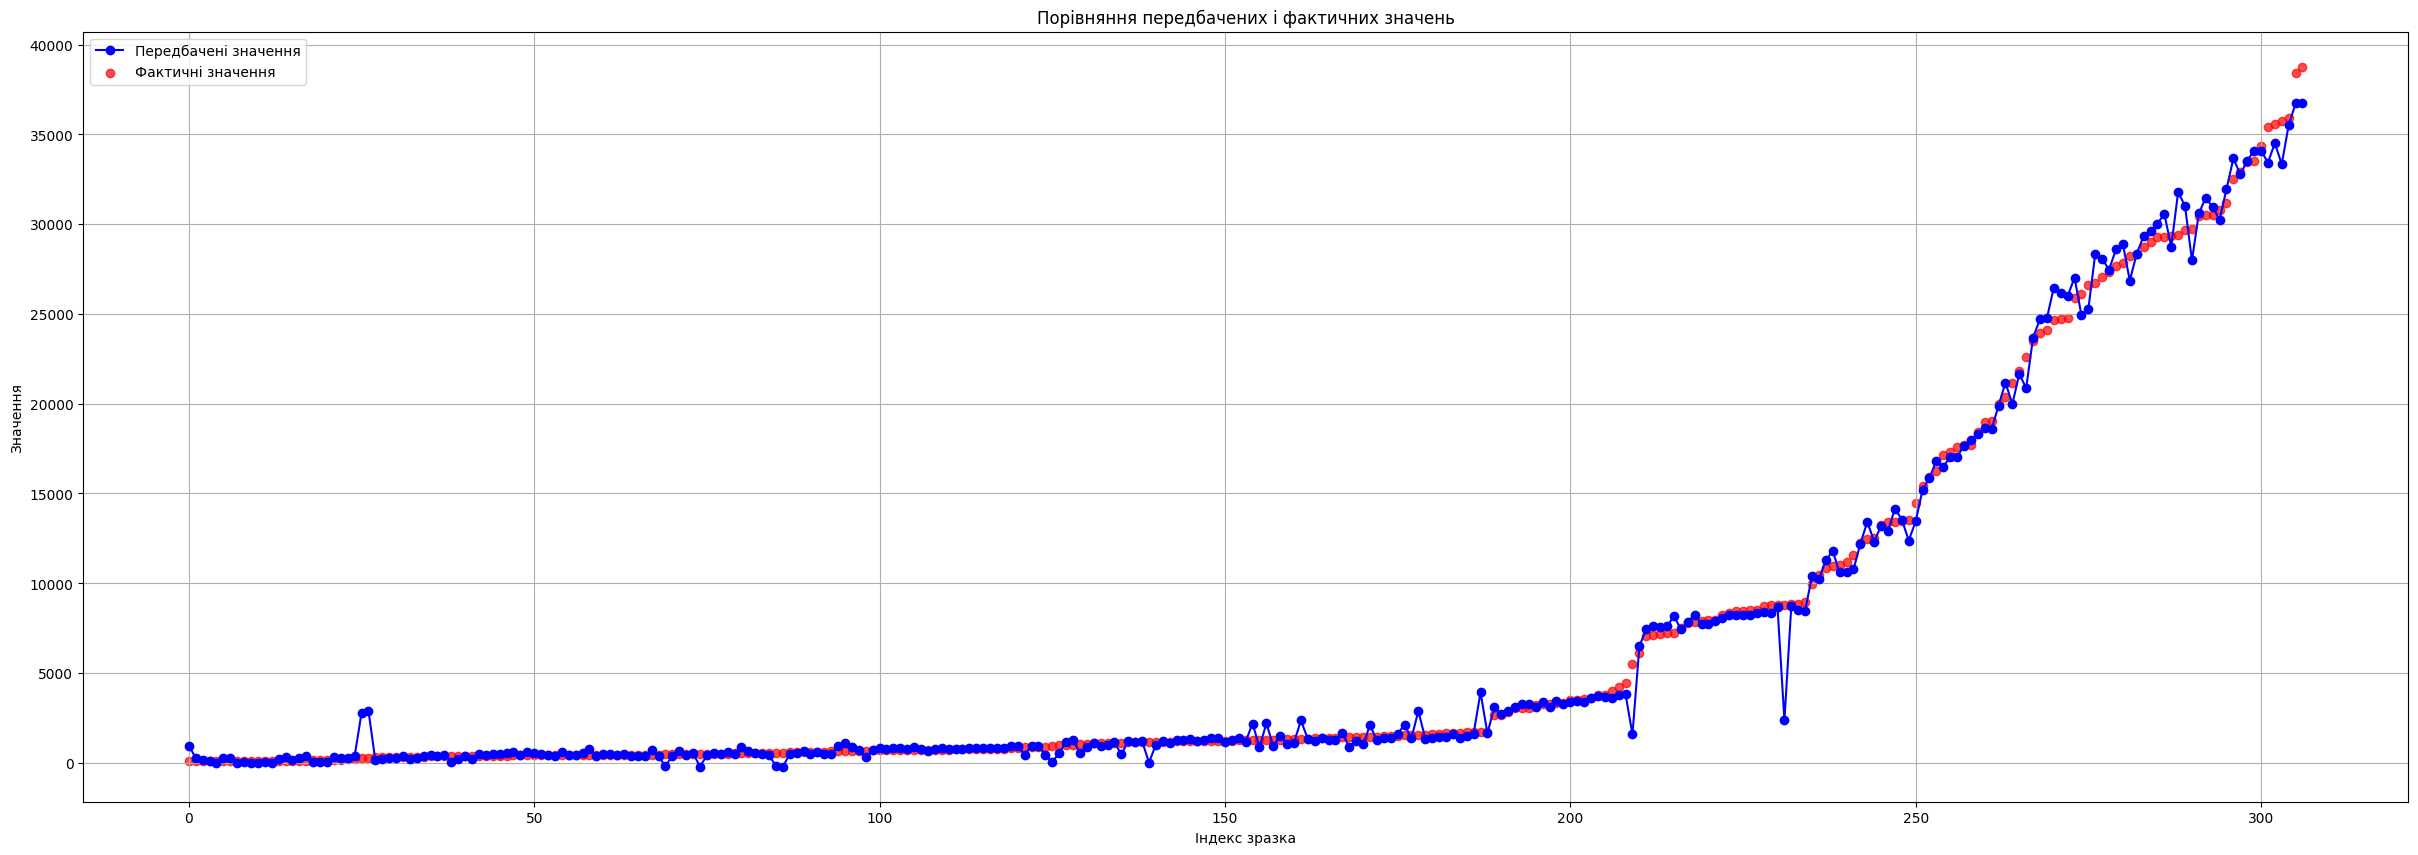

In [53]:
lgb_default_model = lgb.LGBMRegressor()
lgb_default_model.fit(X_train, y_train)
lgb_default_res = lgb_default_model.predict(X_test)

metrics = get_results(lgb_default_res, y_test)
print(metrics)
plot_results(lgb_default_res, y_test)

results_dict["Boosting_lgb"] = metrics["r2"]
# на дефолтних параметрах маємо досить хороший результат. Навіть трохи кращий ніж у randomForest. 
# mse значно менша, права сторона графіку виглядає більш спокіною. А ось на лівій стороні графіку ми маємо менше влучань, ніж при використанні RandomForest

In [54]:
# не має сенсу крутити гіперпараметри, так як ми маємо 99.4 відсотки точок, які здатна описати модель
# при цьому Light GBM має багато параметрів, тож це буде просто дового

In [55]:
# stacking
from sklearn.ensemble import StackingRegressor

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

estimators = [
    ("rf", RandomForestRegressor(random_state=42)),
    ("knn", KNeighborsRegressor()),
    ("tree", DecisionTreeRegressor(random_state=42)),
    ("linear", make_pipeline(StandardScaler(), LinearRegression())),
    ("boosting_lgb", lgb.LGBMRegressor(verbose=0))
]

clf_reg_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

clf_reg_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('knn', KNeighborsRegressor()),
                              ('tree', DecisionTreeRegressor(random_state=42)),
                              ('linear',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('linearregression',
                                                LinearRegression())])),
                              ('boosting_lgb', LGBMRegressor(verbose=0))],
                  final_estimator=LinearRegression())

{'r2': 0.9944334503789668, 'mse': np.float64(576478.0343396211)}


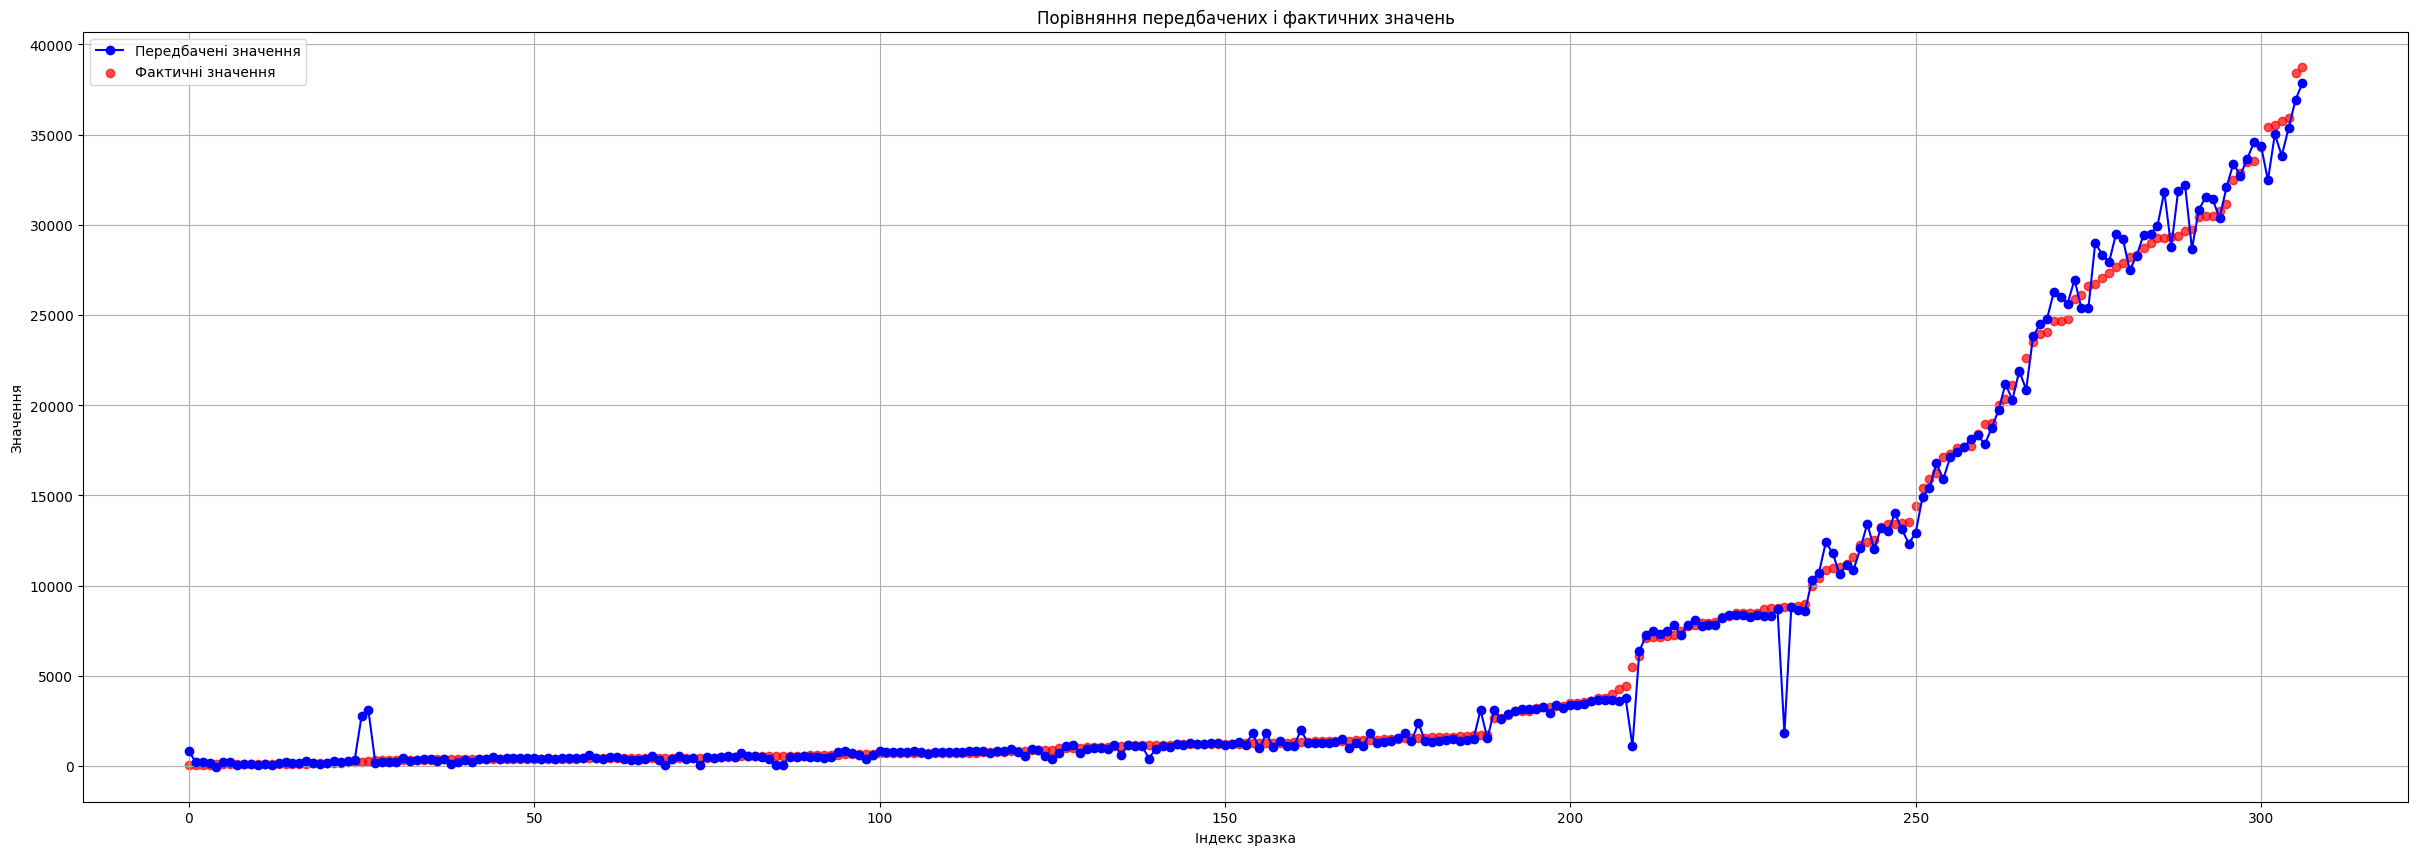

In [57]:
clf_reg_res = clf_reg_model.predict(X_test)

print(get_results(clf_reg_res, y_test))
plot_results(clf_reg_res, y_test)

In [58]:
for e, c in zip(clf_reg_model.estimators_, list(clf_reg_model.final_estimator_.coef_)):
    print (e, ":", c)

RandomForestRegressor(random_state=42) : 0.32818243225327526
KNeighborsRegressor() : -0.0006987464672126298
DecisionTreeRegressor(random_state=42) : 0.03940174738748563
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) : -0.00919731025471019
LGBMRegressor(verbose=0) : 0.6435374775527714


In [59]:
# бачимо що основний предікт відбувається за рахунок LGBMRegressor, значно менше за допомоги DecisionTreeRegressor та RandomForestRegressor
# KNeighborsRegressor та LinearRegression вносять частку негативного впливу. Видалимо їх

estimators = [
    ("rf", RandomForestRegressor(random_state=42)),
    ("tree", DecisionTreeRegressor(random_state=42)),
    ("boosting_lgb", lgb.LGBMRegressor(verbose=0))
]

clf_reg_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

clf_reg_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('tree', DecisionTreeRegressor(random_state=42)),
                              ('boosting_lgb', LGBMRegressor(verbose=0))],
                  final_estimator=LinearRegression())

In [60]:
for e, c in zip(clf_reg_model.estimators_, list(clf_reg_model.final_estimator_.coef_)):
    print (e, ":", c)

RandomForestRegressor(random_state=42) : 0.3271215257707189
DecisionTreeRegressor(random_state=42) : 0.03898743837358065
LGBMRegressor(verbose=0) : 0.6415927266307212


{'r2': 0.9944796759168595, 'mse': np.float64(571690.8665184707)}


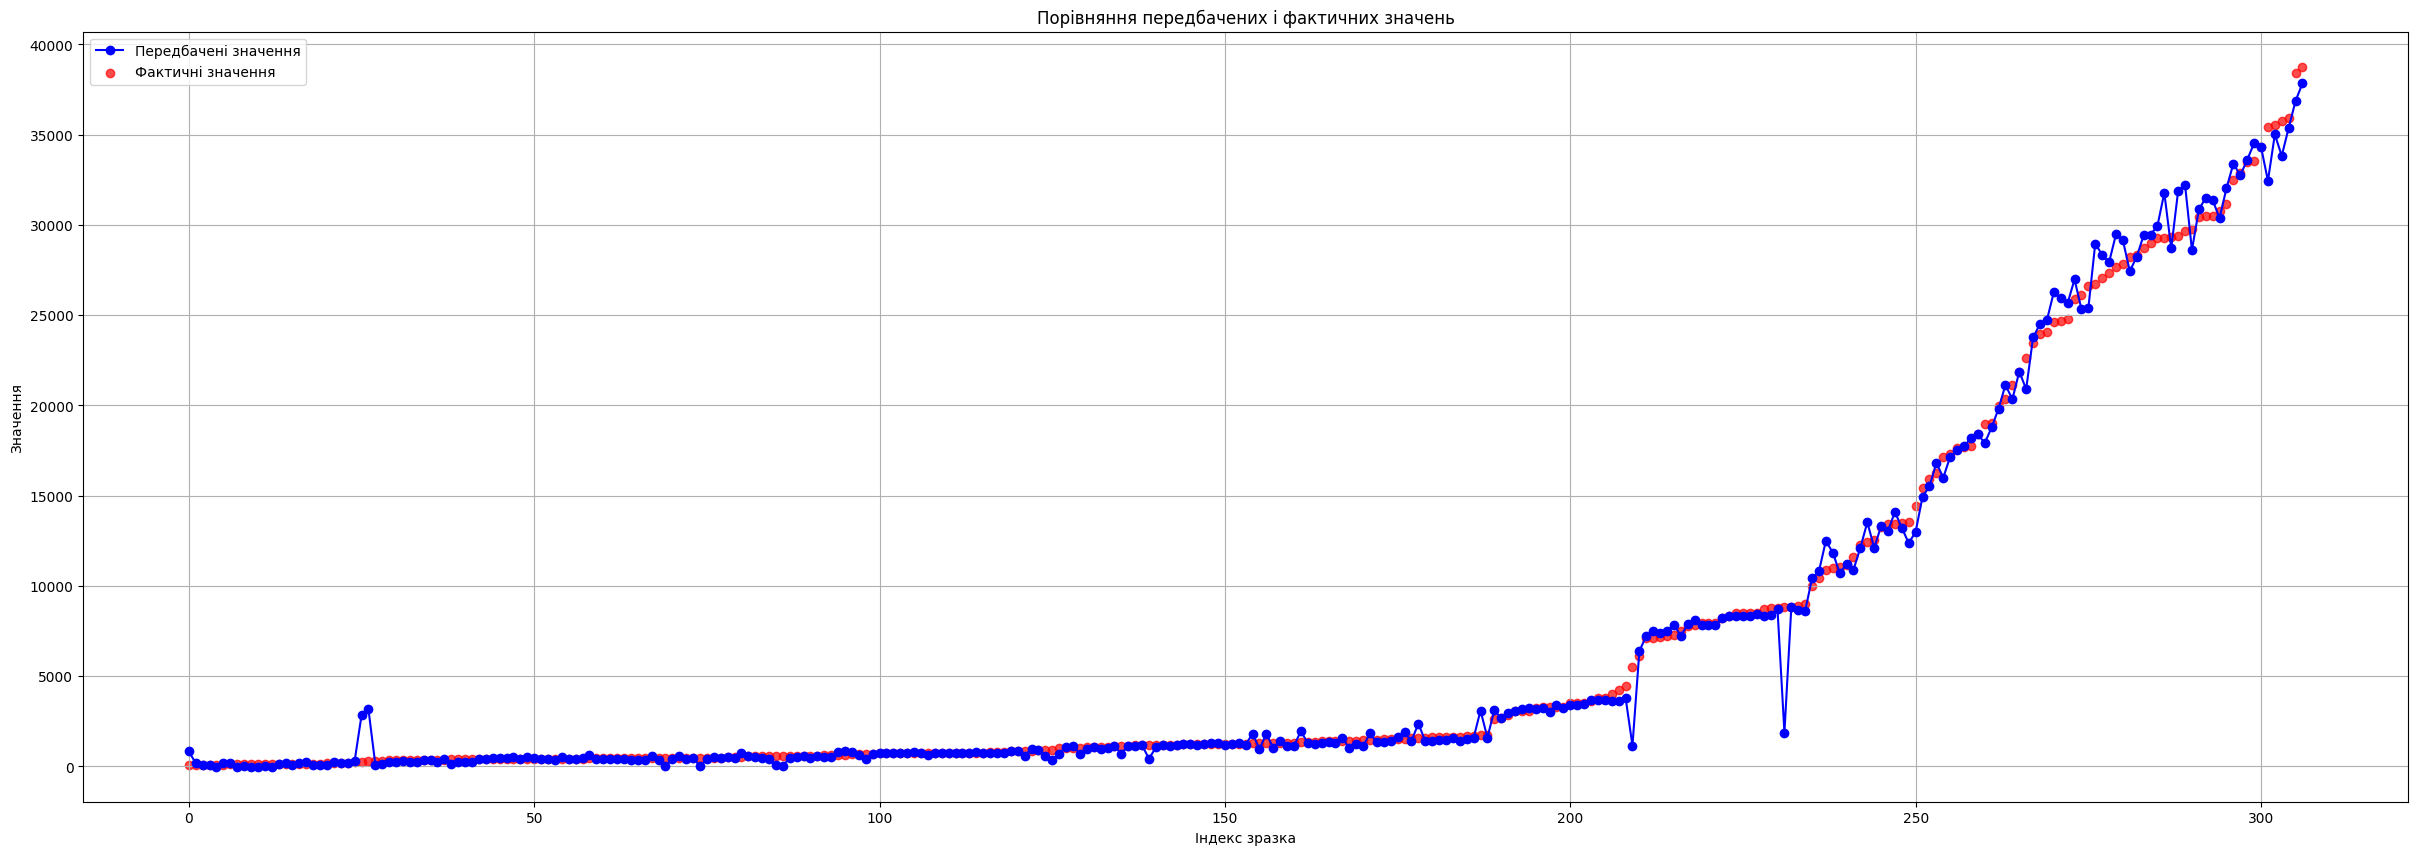

In [61]:
clf_reg_res = clf_reg_model.predict(X_test)
metrics = get_results(clf_reg_res, y_test)
print(metrics)
plot_results(clf_reg_res, y_test)

results_dict["stacking"] = metrics["r2"]
# покращення відбулось на якісь десятитисячні долі, але всеодно по-перше: це приємно, по-друге: спросилась модель

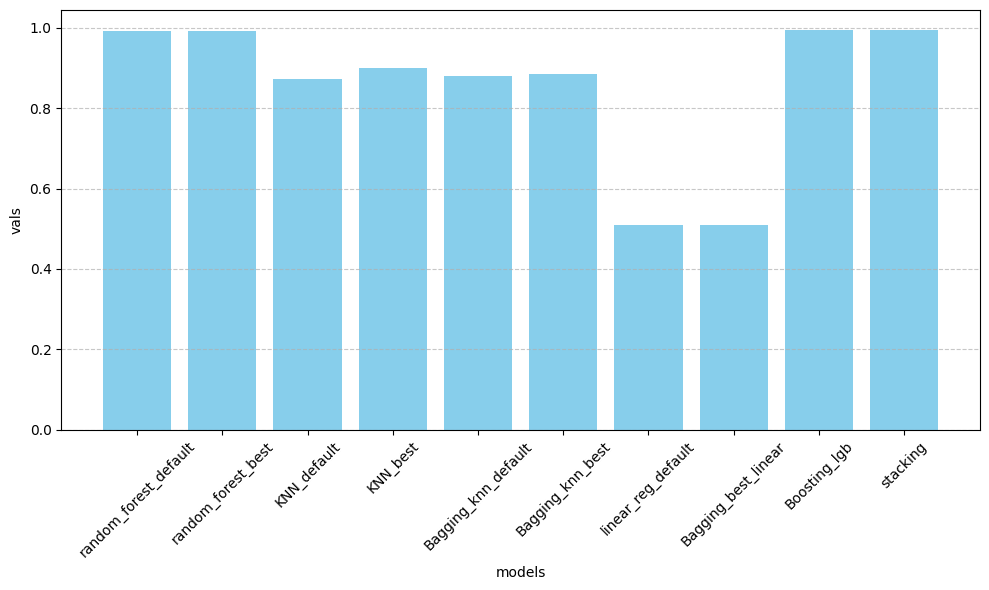

In [62]:
# Виведемо тепер всі результати наших моделей та порівняємо їх

categories = list(results_dict.keys())
values = list(results_dict.values())

# Створюємо стовпчикову діаграму
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue',)

# Додаємо підписи
plt.xlabel('models')
plt.ylabel('vals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Відображаємо графік
plt.tight_layout()
plt.show()

In [63]:
results_dict

{'random_forest_default': 0.9919546408936801,
 'random_forest_best': 0.9922228543835424,
 'KNN_default': 0.872033586019924,
 'KNN_best': 0.9013453159563772,
 'Bagging_knn_default': 0.8814307642848794,
 'Bagging_knn_best': 0.8852038665227446,
 'linear_reg_default': 0.5082063278387431,
 'Bagging_best_linear': 0.50908009400577,
 'Boosting_lgb': 0.994868199025075,
 'stacking': 0.9944796759168595}

У підсумку підбір моделі сильно залежить від того як розподіляються дані. Дискретні дані, як ми побачили, дуже важко використовувати для моделей лінійної регресії. Проте з ними зручно працювати такими алгоритмами як дерева рішень. Але використовуючи одне дерево рішень дуже легко перенавчити модель. Тож в такому випадку, якщо нас не цікавить розуміння "що та звідки взялось" - кращє використовувати RandomForest, та інші ансамблеві алгоритми. Як ми могли побачити ансамблі не завжди можуть покращити результат поодинокої моделі (як то bagging з knn моделлю у якості естіматора).
